# PRCP-1006 - Home Loan Default - Risk Management Notebook 1
    
    By: PTID-CDS-JAN22-1266
        Guiller Fiestada                                   

### Datasets

- **application_train.csv**

    - This is the main table.
    - Static data for all applications. One row represents one loan in our data sample.

- **bureau.csv**

    - All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
    - For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.
    
- **bureau_balance.csv**

    - Monthly balances of previous credits in Credit Bureau.
    - This table has one row for each month of history of every previous credit reported to Credit Bureau 
    
- **POS_CASH_balance.csv**

    - Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
    - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample.

- **credit_card_balance.csv**

    - Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
    - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample.

- **previous_application.csv**

    - All previous applications for Home Credit loans of clients who have loans in our sample.
    - There is one row for each previous application related to loans in our data sample.

- **installments_payments.csv**

    - Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
    - There is a) one row for every payment that was made plus b) one row each for missed payment.
    - One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

# 1. Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#model validation
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score ,precision_score , f1_score 
from sklearn.metrics import log_loss,roc_auc_score,roc_curve,auc

# File system manangement
import os

# 2. Loading Dataset 

In [2]:
appli_train  =  pd.read_csv('application_train.csv')
bureau = pd.read_csv('bureau.csv')
bureau_bal = pd.read_csv('bureau_balance.csv')
credit_card_bal = pd.read_csv('credit_card_balance.csv')
installment = pd.read_csv('installments_payments.csv')
pos_bal = pd.read_csv('POS_CASH_balance.csv')
prev_appli = pd.read_csv('previous_application.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

appli_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [5]:
bureau_bal.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [6]:
credit_card_bal.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [7]:
installment.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [8]:
pos_bal.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [9]:
prev_appli.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

**Initial Observation**

Tables are connected each other with **SK_ID_CURR**, **SK_ID_BUREAU** and **SK_ID_PREV** key ids.

# 3. EDA

##  3-A  application_train EDA

In [10]:
appli_train.shape

(307511, 122)

In [11]:
appli_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [12]:
categorical_cols = [appli_train.columns[i] for i in range(appli_train.shape[1])\
            if appli_train.dtypes[i] == 'object']
numeric_cols = [appli_train.columns[i] for i in range(appli_train.shape[1])\
                if (appli_train.dtypes[i] == 'float64') | (appli_train.dtypes[i] == 'int64')]
print(categorical_cols)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [13]:
len(categorical_cols)

16

In [14]:
len(numeric_cols)

106

In [15]:
#Checking the categorical data

appli_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

There are categorical variables that has 2 unique variables so its ok to use label encoding with columns which has 2 unique variables and one hot encoding with the rest.

In [16]:
#Checking numerical statistical information

appli_train.select_dtypes(['float64','int64']).describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [17]:
#Missing Values

total = appli_train.isnull().sum().sort_values(ascending = False)
percent = (appli_train.isnull().sum()/appli_train.isnull().count()*100).sort_values(ascending = False)
missing_val_train = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_val_train

Total    Percent
COMMONAREA_MEDI               214865  69.872297
COMMONAREA_AVG                214865  69.872297
COMMONAREA_MODE               214865  69.872297
NONLIVINGAPARTMENTS_MODE      213514  69.432963
NONLIVINGAPARTMENTS_AVG       213514  69.432963
NONLIVINGAPARTMENTS_MEDI      213514  69.432963
FONDKAPREMONT_MODE            210295  68.386172
LIVINGAPARTMENTS_MODE         210199  68.354953
LIVINGAPARTMENTS_AVG          210199  68.354953
LIVINGAPARTMENTS_MEDI         210199  68.354953
FLOORSMIN_AVG                 208642  67.848630
FLOORSMIN_MODE                208642  67.848630
FLOORSMIN_MEDI                208642  67.848630
YEARS_BUILD_MEDI              204488  66.497784
YEARS_BUILD_MODE              204488  66.497784
YEARS_BUILD_AVG               204488  66.497784
OWN_CAR_AGE                   202929  65.990810
LANDAREA_MEDI                 182590  59.376738
LANDAREA_MODE                 182590  59.376738
LANDAREA_AVG                  182590  59.376738
BASEMENTAREA_MEDI             179943  58.515956
BASEMENTAREA_AVG              179943  58.515956
BASEMENTAREA_MODE             179943  58.515956
EXT_SOURCE_1                  173378  56.381073
NONLIVINGAREA_MODE            169682  55.179164
NONLIVINGAREA_AVG             169682  55.179164
NONLIVINGAREA_MEDI            169682  55.179164
ELEVATORS_MEDI                163891  53.295980
ELEVATORS_AVG                 163891  53.295980
ELEVATORS_MODE                163891  53.295980
WALLSMATERIAL_MODE            156341  50.840783
APARTMENTS_MEDI               156061  50.749729
APARTMENTS_AVG                156061  50.749729
APARTMENTS_MODE               156061  50.749729
ENTRANCES_MEDI                154828  50.348768
ENTRANCES_AVG                 154828  50.348768
ENTRANCES_MODE                154828  50.348768
LIVINGAREA_AVG                154350  50.193326
LIVINGAREA_MODE               154350  50.193326
LIVINGAREA_MEDI               154350  50.193326
HOUSETYPE_MODE                154297  50.176091
FLOORSMAX_MODE                153020  49.760822
FLOORSMAX_MEDI                153020  49.760822
FLOORSMAX_AVG                 153020  49.760822
YEARS_BEGINEXPLUATATION_MODE  150007  48.781019
YEARS_BEGINEXPLUATATION_MEDI  150007  48.781019
YEARS_BEGINEXPLUATATION_AVG   150007  48.781019
TOTALAREA_MODE                148431  48.268517
EMERGENCYSTATE_MODE           145755  47.398304
OCCUPATION_TYPE                96391  31.345545
EXT_SOURCE_3                   60965  19.825307
AMT_REQ_CREDIT_BUREAU_HOUR     41519  13.501631
AMT_REQ_CREDIT_BUREAU_DAY      41519  13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     41519  13.501631
AMT_REQ_CREDIT_BUREAU_MON      41519  13.501631
AMT_REQ_CREDIT_BUREAU_QRT      41519  13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     41519  13.501631
NAME_TYPE_SUITE                 1292   0.420148
OBS_30_CNT_SOCIAL_CIRCLE        1021   0.332021
DEF_30_CNT_SOCIAL_CIRCLE        1021   0.332021
OBS_60_CNT_SOCIAL_CIRCLE        1021   0.332021
DEF_60_CNT_SOCIAL_CIRCLE        1021   0.332021
EXT_SOURCE_2                     660   0.214626
AMT_GOODS_PRICE                  278   0.090403
AMT_ANNUITY                       12   0.003902
CNT_FAM_MEMBERS                    2   0.000650
DAYS_LAST_PHONE_CHANGE             1   0.000325
CNT_CHILDREN                       0   0.000000
FLAG_DOCUMENT_8                    0   0.000000
NAME_CONTRACT_TYPE                 0   0.000000
CODE_GENDER                        0   0.000000
FLAG_OWN_CAR                       0   0.000000
FLAG_DOCUMENT_2                    0   0.000000
FLAG_DOCUMENT_3                    0   0.000000
FLAG_DOCUMENT_4                    0   0.000000
FLAG_DOCUMENT_5                    0   0.000000
FLAG_DOCUMENT_6                    0   0.000000
FLAG_DOCUMENT_7                    0   0.000000
FLAG_DOCUMENT_9                    0   0.000000
FLAG_DOCUMENT_21                   0   0.000000
FLAG_DOCUMENT_10                   0   0.000000
FLAG_DOCUMENT_11                   0   0.000000
FLAG_OWN_REALTY                    0   0.000000

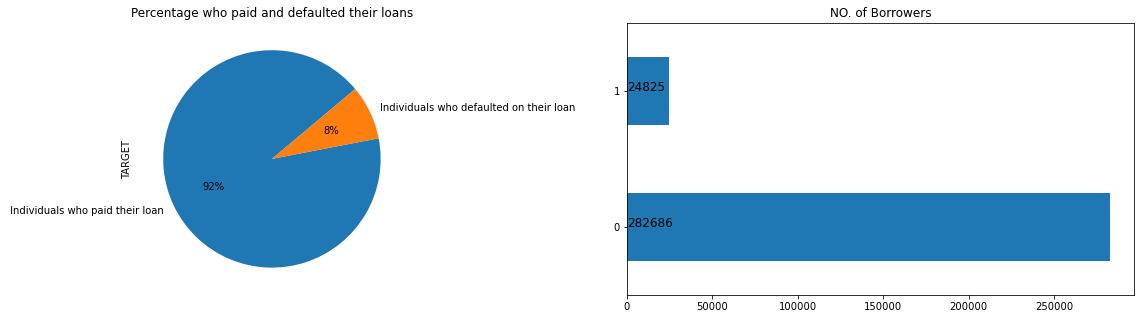

In [18]:
# Plotting distribution of the TARGET variable 

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(20,5))

ax1 = appli_train["TARGET"].value_counts().plot.pie( x="1" ,y ='TARGET', 
                   autopct = "%1.0f%%",labels=[" Individuals who paid their loan","Individuals who defaulted on their loan"], startangle = 40,ax=ax1);
ax1.set(title = 'Percentage who paid and defaulted their loans')

ax2 = appli_train["TARGET"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(appli_train["TARGET"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'NO. of Borrowers')
plt.show()

#### From the above data, we can see that the target variable is unbalance

TARGET == 0 --> Individuals who paid their loan

TARGET == 1 --> Individuals who defaulted on their loan

### Visualization of Categorical Data

In [19]:
#Creating Funtion for Graphical Representation of categorical data 

def graph_rep(feature):
    temp = appli_train[feature].value_counts()
    df = pd.DataFrame({feature: temp.index,'Number of Borrowers': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = appli_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,5))
    
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of Borrowers",data=df)
    s.set_xticklabels(s.get_xticklabels(),rotation=60)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    s.set_xticklabels(s.get_xticklabels(),rotation=60)
    plt.ylabel('Percent of Defaulted, Target = 1', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [20]:
#Checikng information of Age
(appli_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

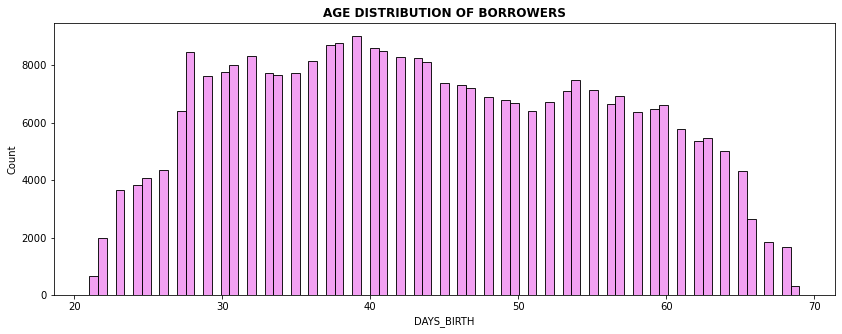

In [21]:
# Checking distribution of Age
X = round(abs(appli_train['DAYS_BIRTH'] / (365)))
fig = plt.figure(figsize=(14,5))

sns.histplot(data= appli_train, x = X, color = 'violet')
plt.title('AGE DISTRIBUTION OF BORROWERS', fontsize=12, weight='bold')
plt.show()


Borrowers Age ranges from 20 years old to 68 years old.  

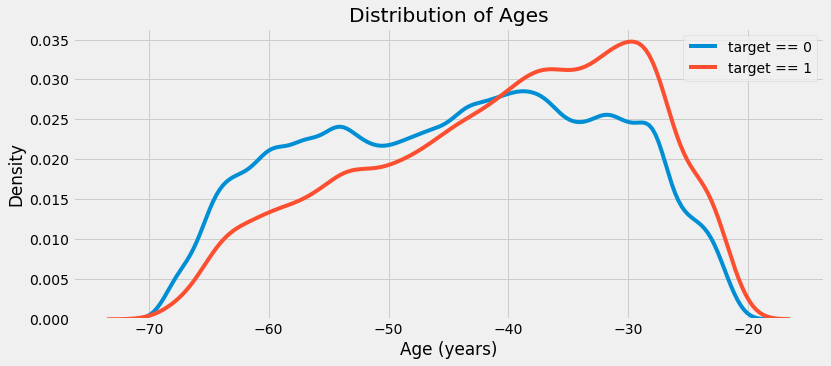

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 5))

# KDE plot of loans that were repaid on time
sns.kdeplot(appli_train.loc[appli_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of Individual defaulted their loans
sns.kdeplot(appli_train.loc[appli_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.legend()

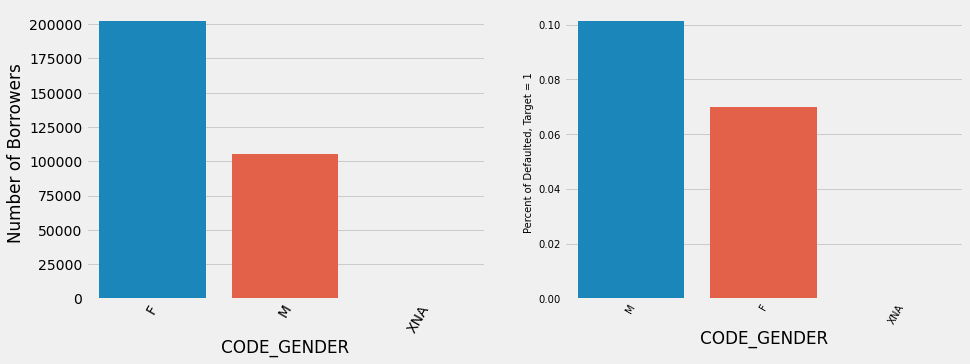

In [23]:
# Distribution of Gender

graph_rep('CODE_GENDER')

From the above graph, Males are most likely defaulted their loans   
also there's a strange value 'XNA' that will need to remove

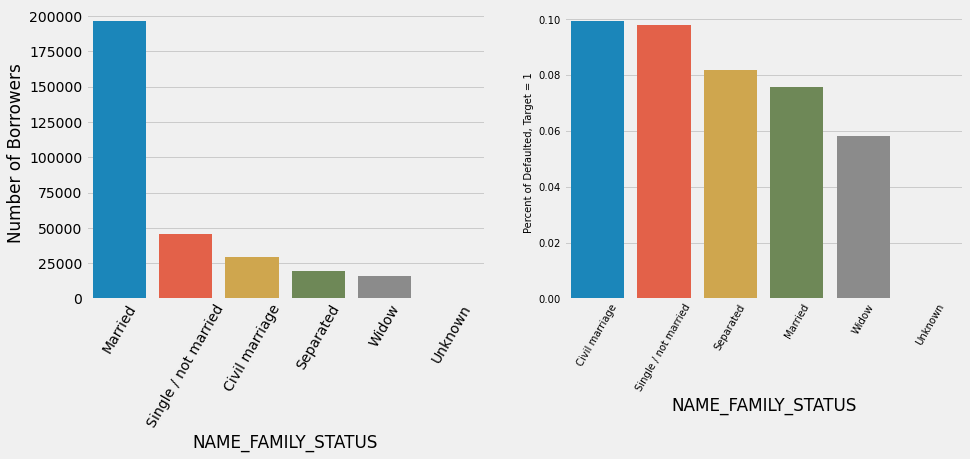

In [24]:
# Distribution of lenders by family status

graph_rep('NAME_FAMILY_STATUS')


We can clearly see that majority of the borrower are married and single and Married/Civil Marriage are most likely to default the loan

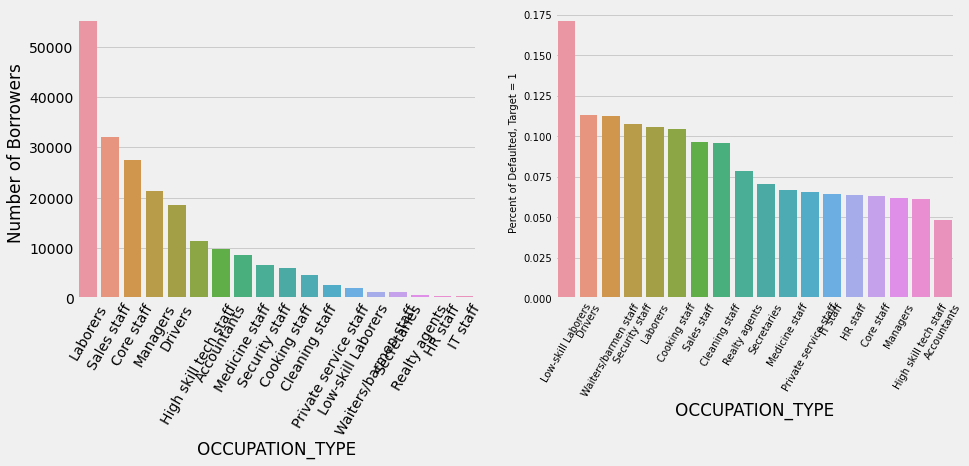

In [25]:
# Distribution of Borrowers Occupation

graph_rep('OCCUPATION_TYPE')


Laborers and Sales Staff are the most frequent type of borrower.   
Low Skill Laborers are most likely defaulted their loans.

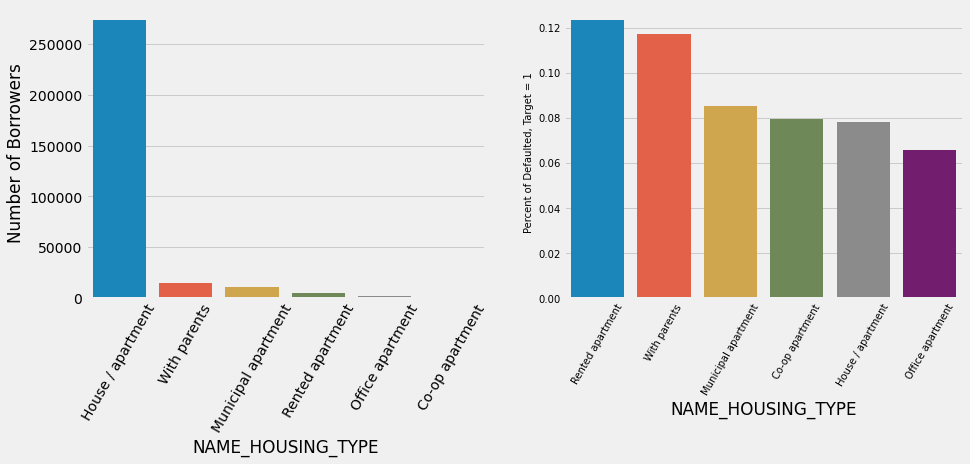

In [26]:
#Borrower Living situation

graph_rep('NAME_HOUSING_TYPE')


Majority of borrowers are living in a house or apartment   
Both people with rented apartment and who lives with their parents are more likely to default the loan

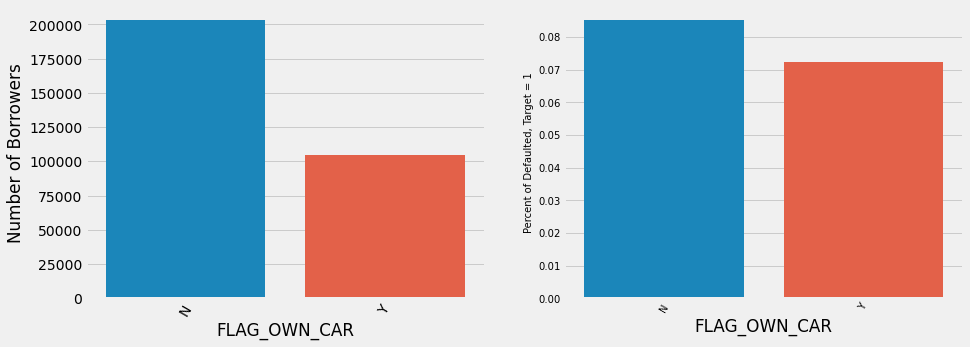

In [27]:
#Borrower owning a car

graph_rep('FLAG_OWN_CAR')


Most borrower doesn't own a car  
People who doesn't own a car has a high chance of defaulting the loan

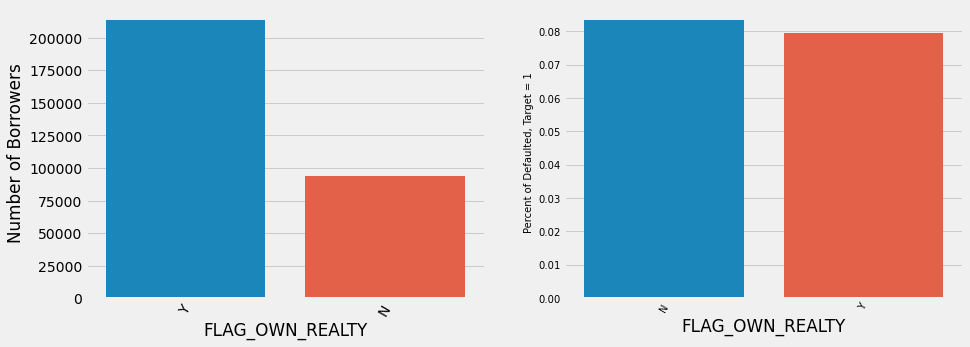

In [28]:
#Borrower owning realty

graph_rep('FLAG_OWN_REALTY')


Most borrower has own realty properties but it doesnt determine the chance of defaulting the loan


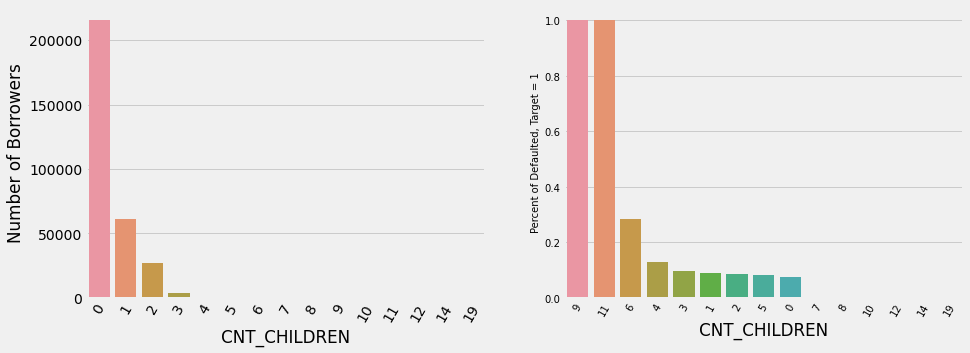

In [29]:
#Borrowers With no. of Children

graph_rep('CNT_CHILDREN')


Most borrower doesn't have a child  
The more child a borrwer have, the higher the chance a loan will be defaulted

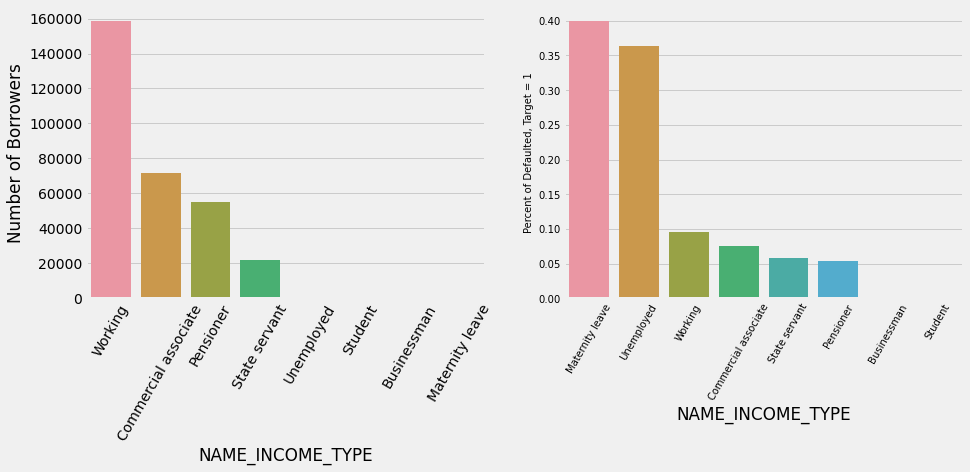

In [30]:
# Borrowers Income distribution

graph_rep('NAME_INCOME_TYPE')

Most Borrowers are Working and as Commercial Associate  
Both Unemployed and people who take Maternity leave are most likely defaulted their loans

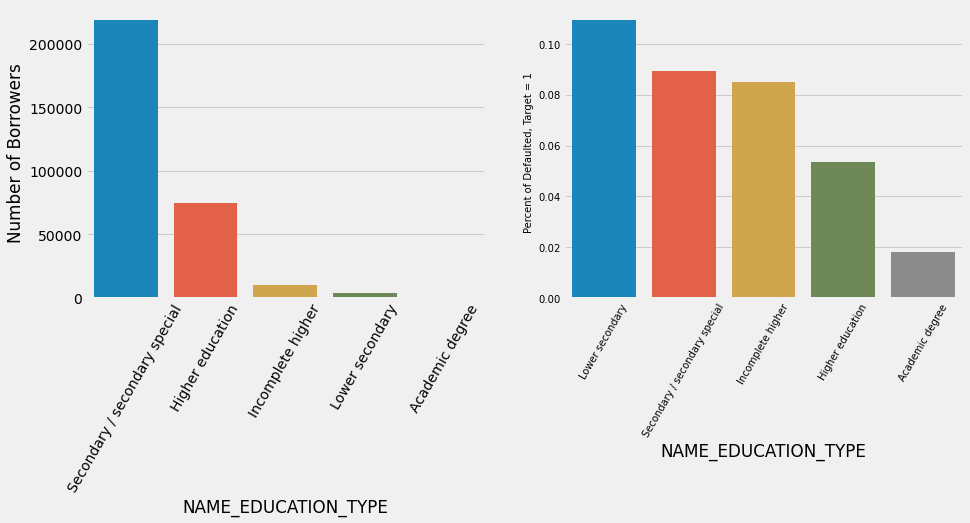

In [31]:
graph_rep('NAME_EDUCATION_TYPE')

Most likely lower secondary level has defaulted their loan.

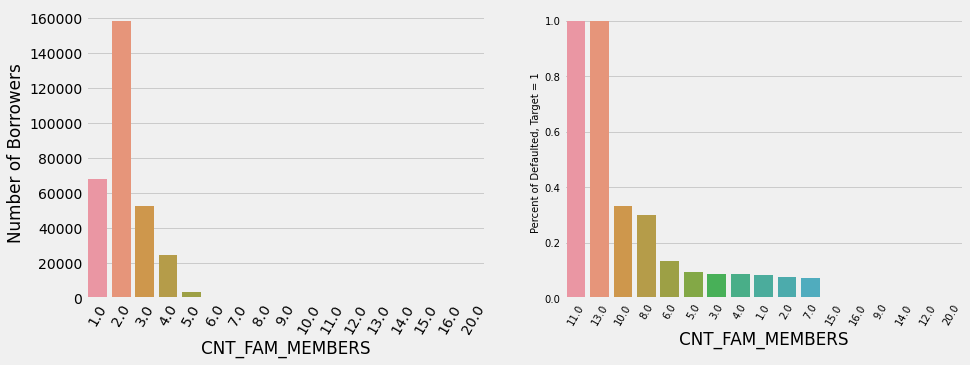

In [32]:
#Distribution of Numbers of Family Members

graph_rep('CNT_FAM_MEMBERS')

The more family member a borrower have, the higher the chance a loan will be defaulted

### Visualization of Numerical Data

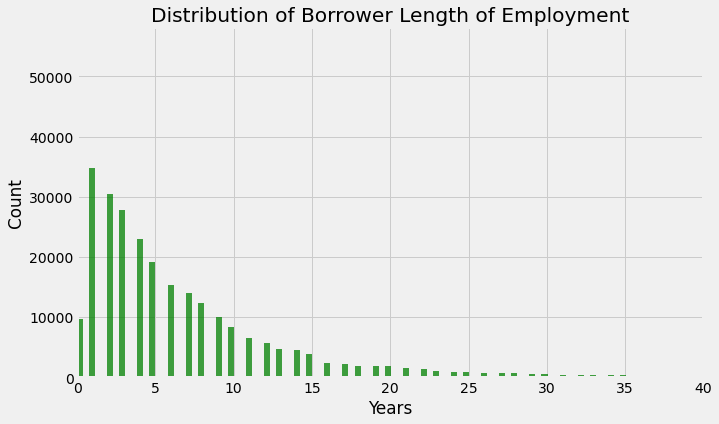

In [33]:
# Employment distribution
X = round(abs(appli_train['DAYS_EMPLOYED'] / (365)))
plt.subplots(figsize =(10, 6))
sns.histplot(data= appli_train, x = X, color = 'green')
plt.title('Distribution of Borrower Length of Employment')
plt.xlabel('Years')
plt.xlim(0, 40)
plt.show()

The majority of borrowers are less than 15 years of employment experience.

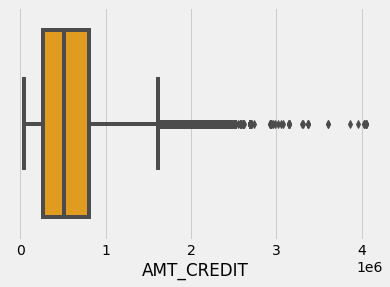

In [34]:
# Credit distribution
sns.boxplot(data = appli_train, x = 'AMT_CREDIT', color = 'orange')
plt.show()

Although there are borrowers with credit up to 4 Million, approximately three-quarters of borrowers have less than 1 Million in credit.

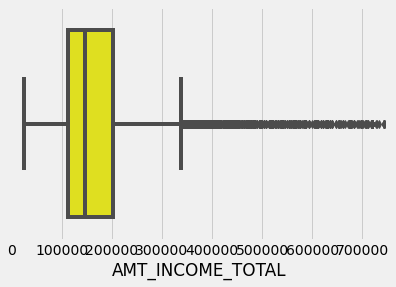

In [35]:
# Income distribution
sns.boxplot(data = appli_train, x = 'AMT_INCOME_TOTAL', color = 'yellow')
plt.xlim(0, 750000)
plt.show()

Although some income levels are as high as 1 Million, approximately three-quarters of borrowers earn less than 200,000.

In [36]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(appli_train[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

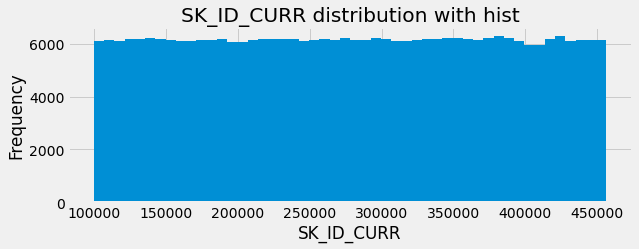

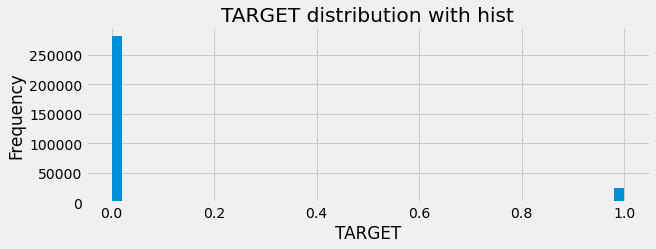

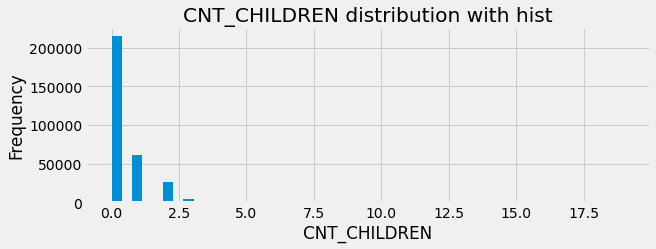

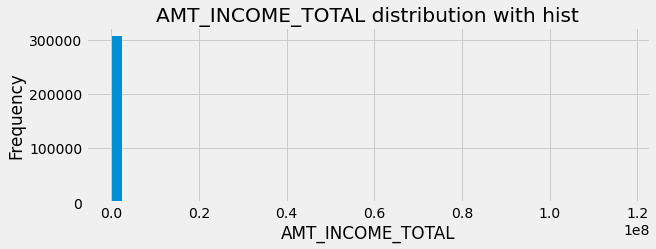

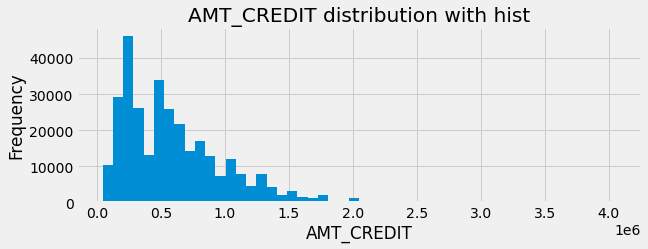

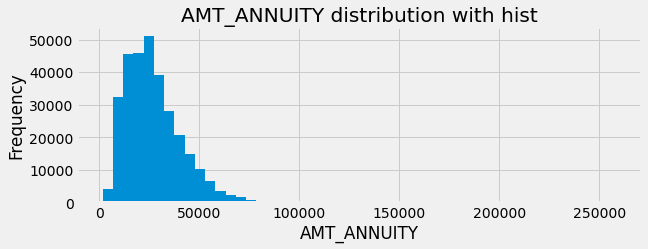

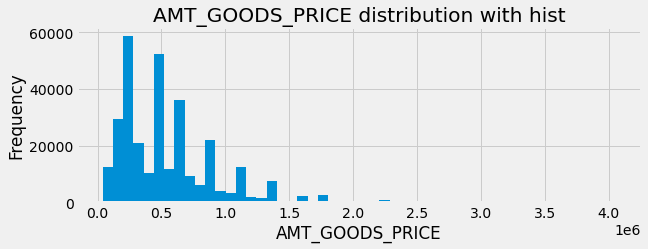

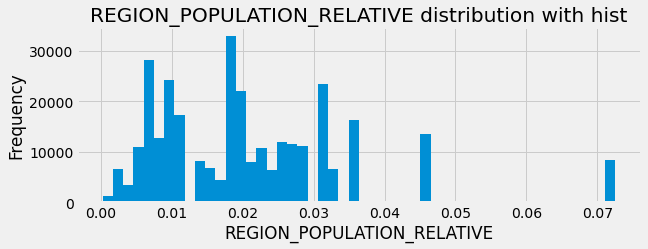

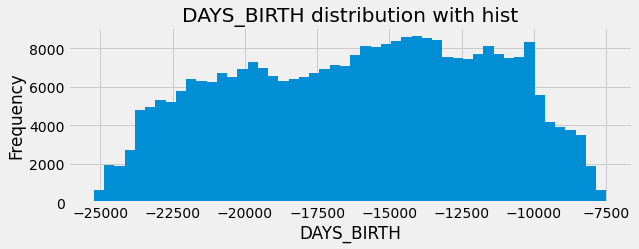

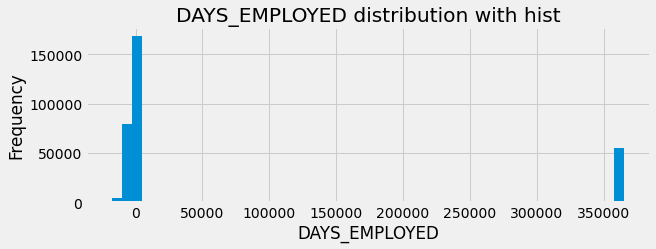

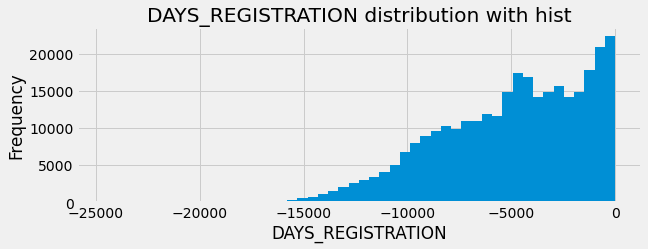

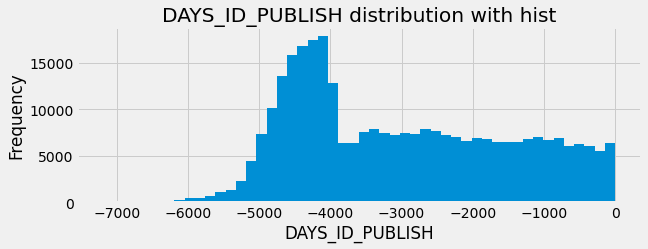

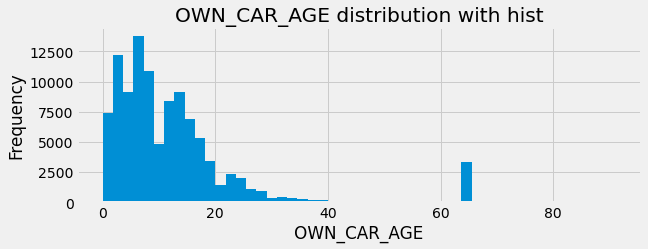

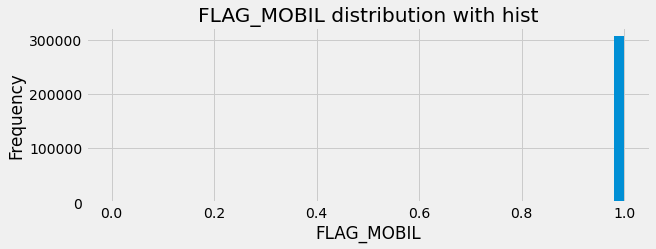

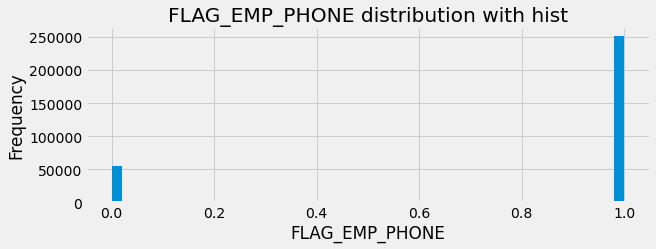

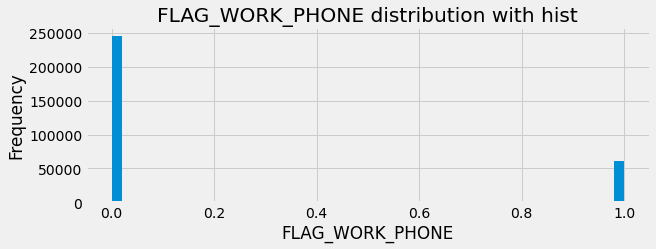

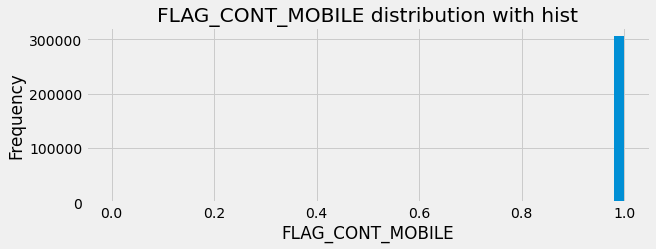

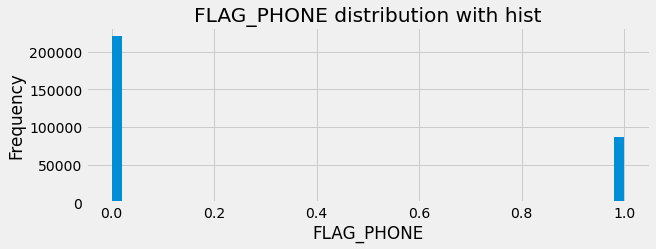

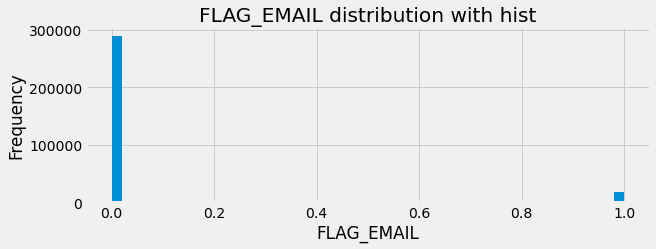

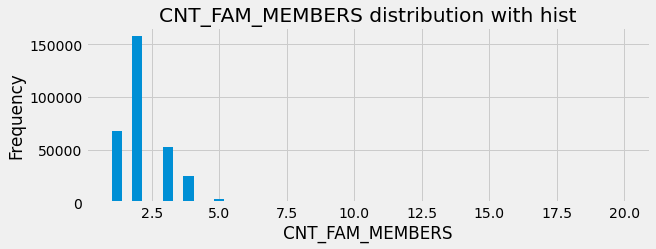

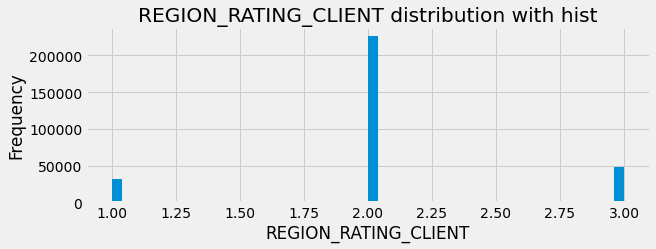

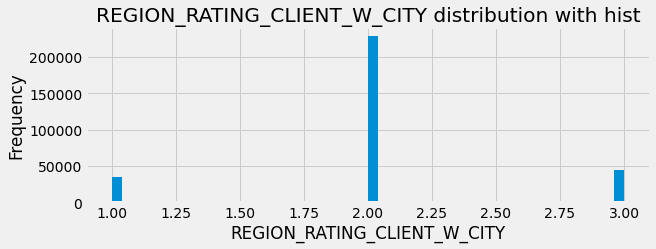

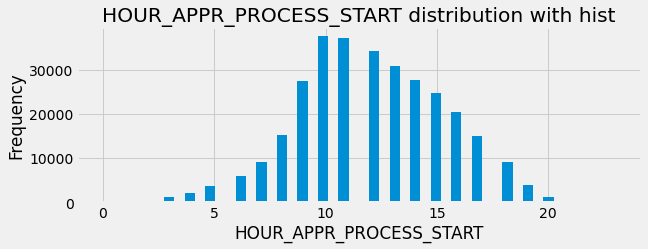

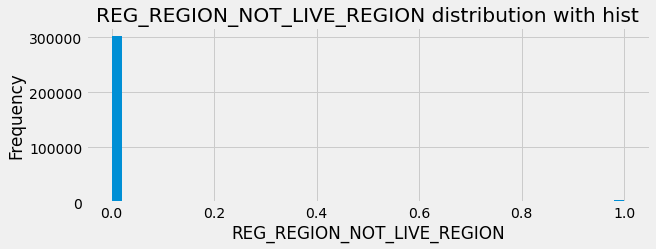

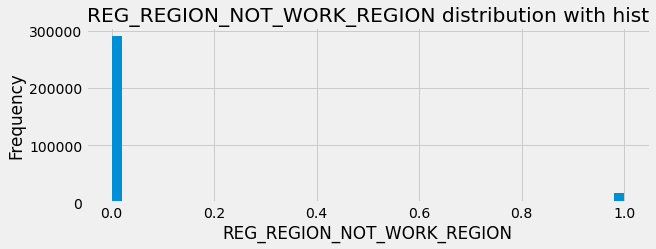

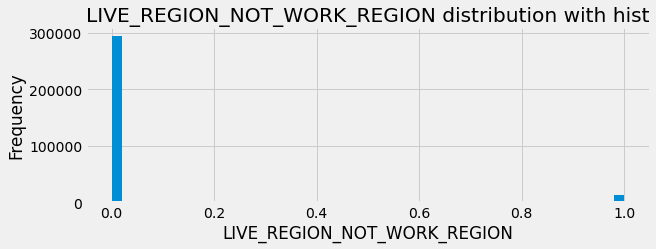

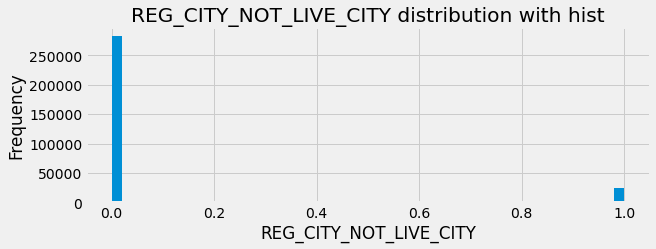

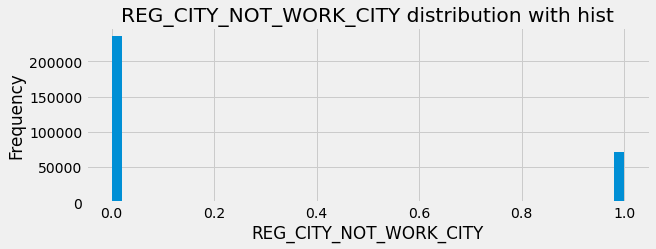

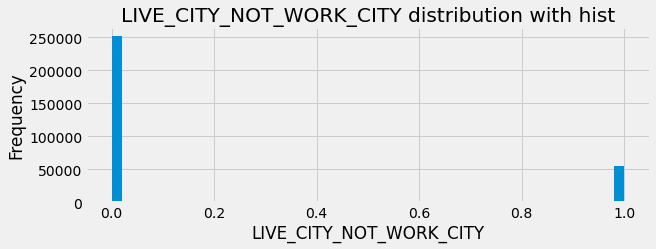

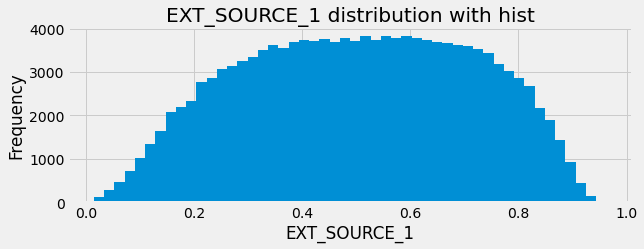

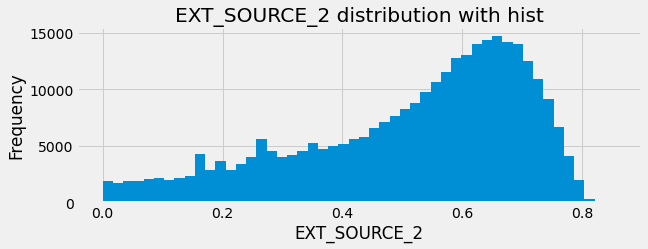

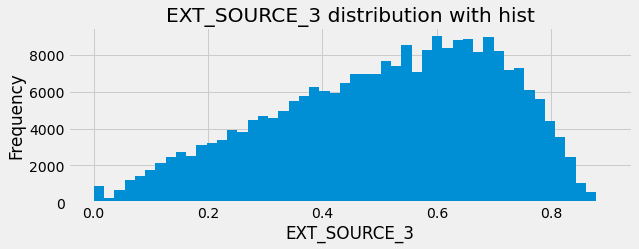

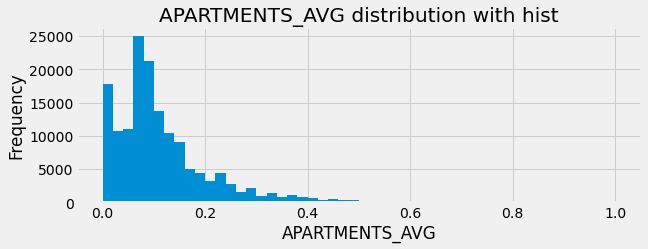

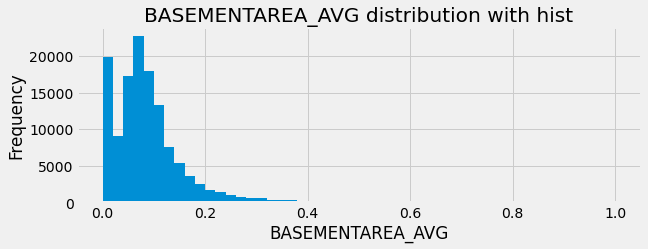

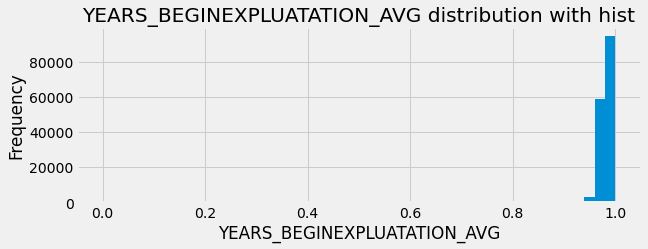

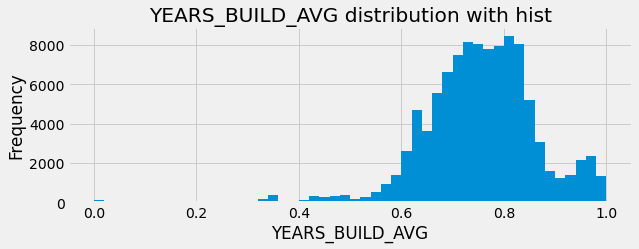

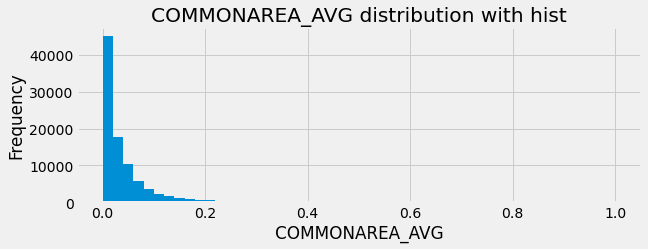

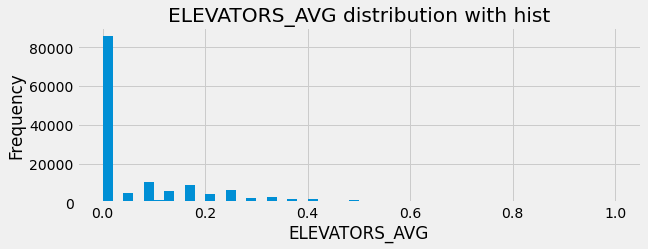

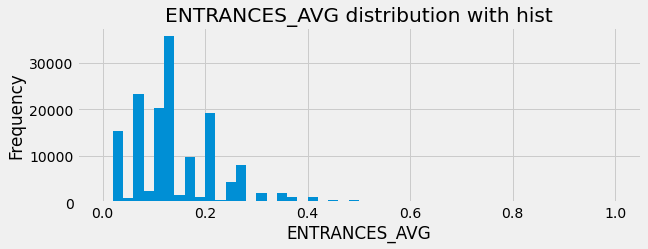

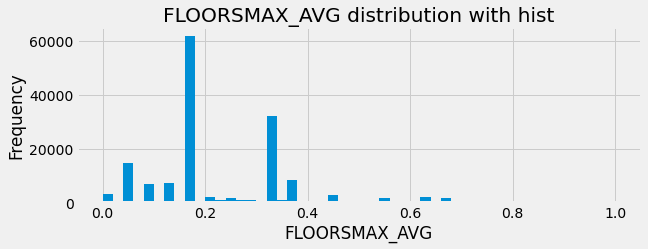

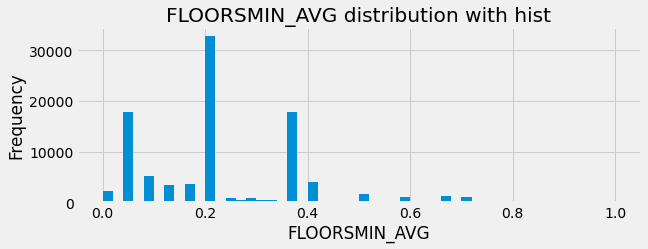

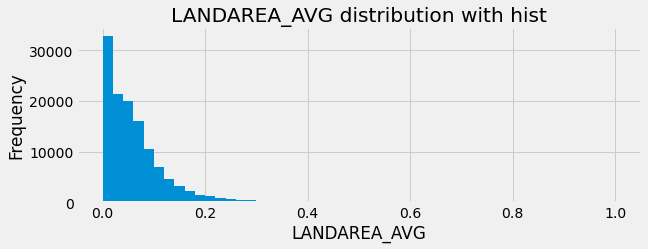

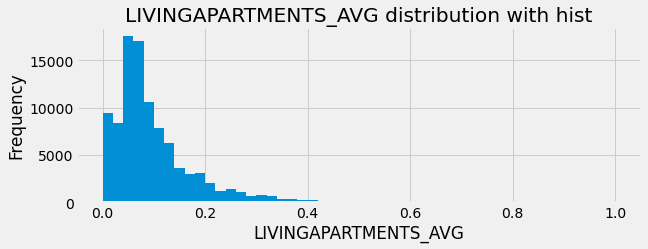

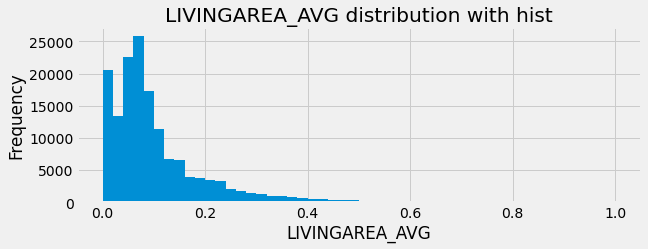

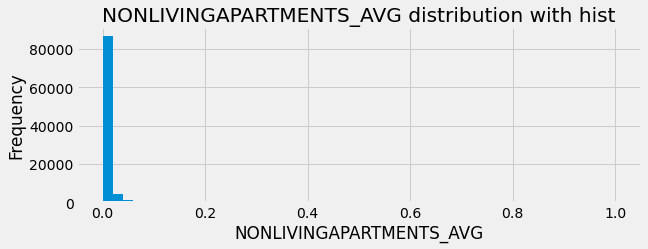

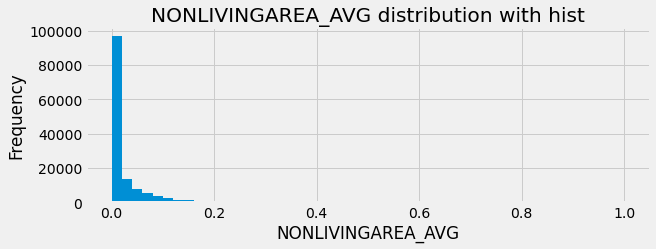

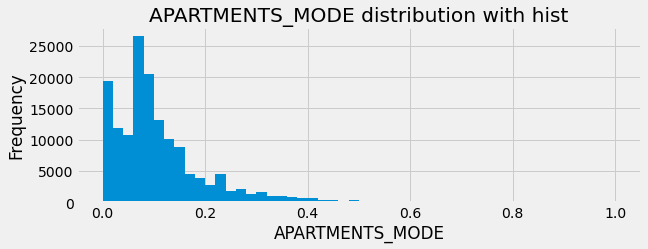

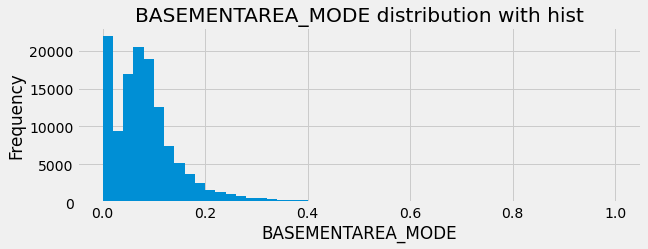

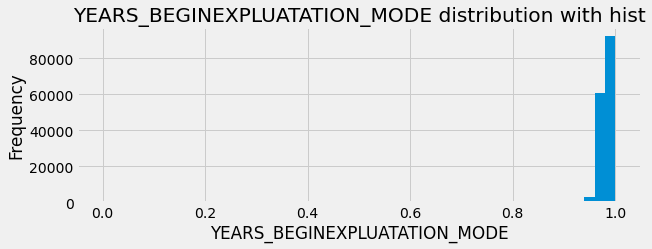

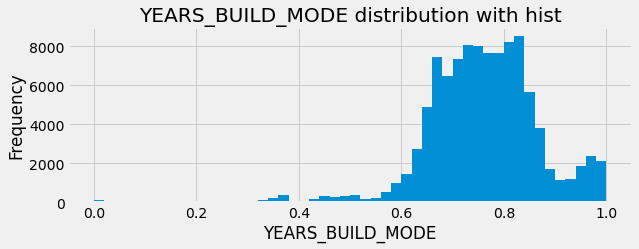

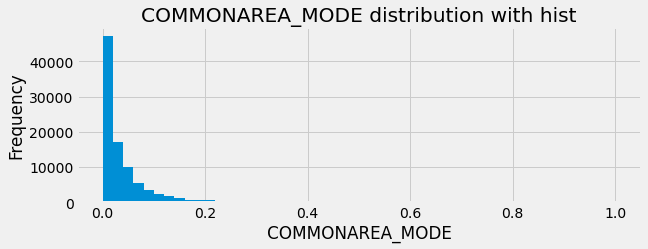

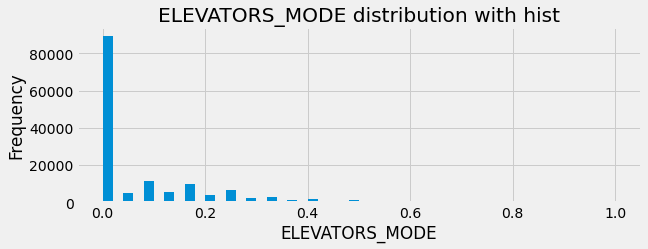

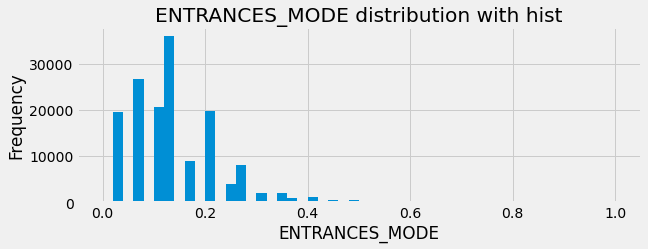

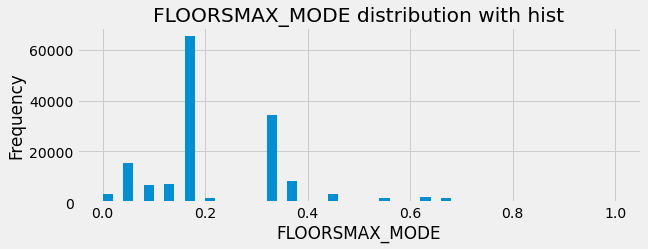

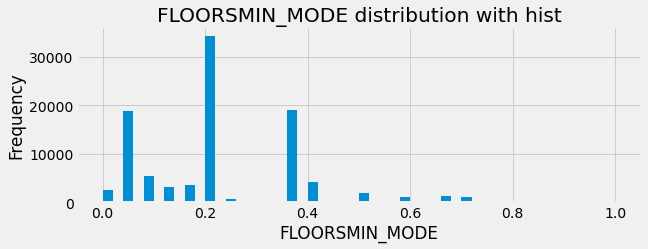

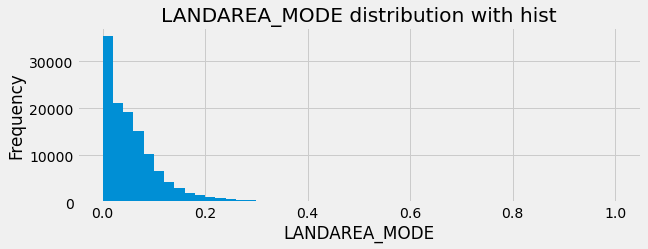

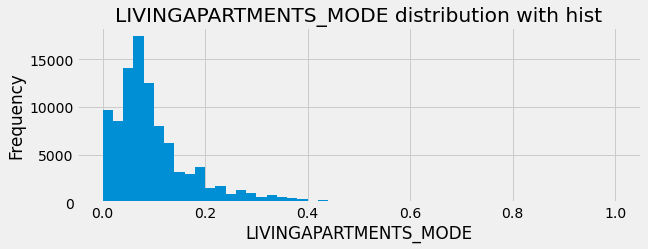

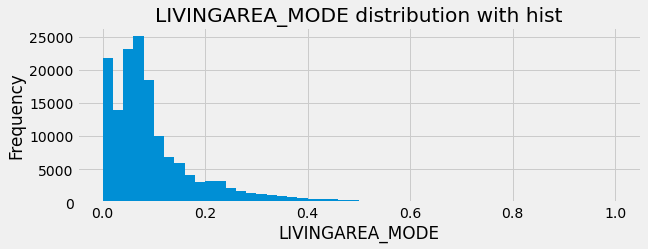

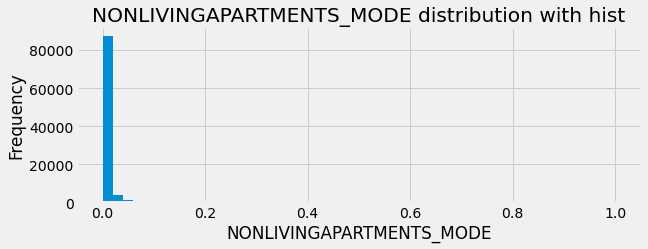

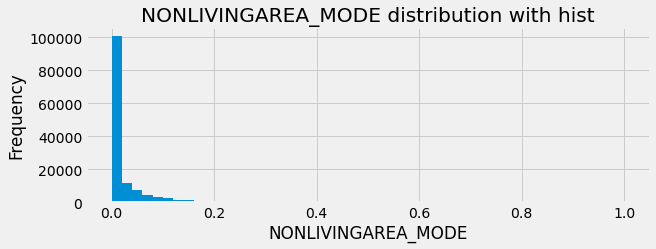

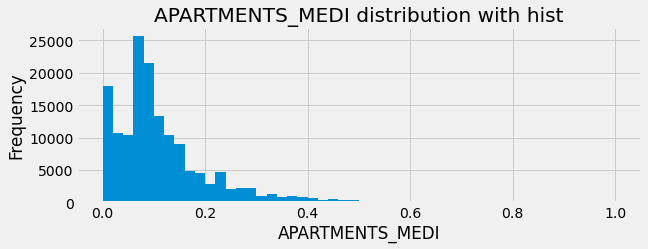

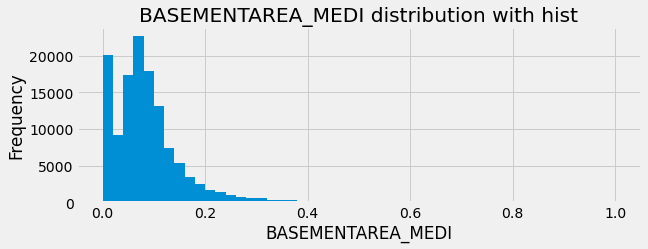

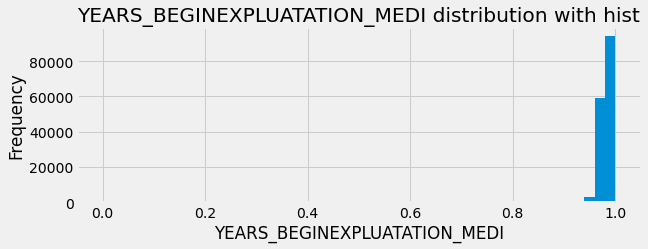

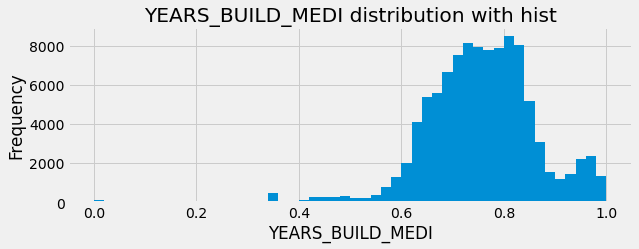

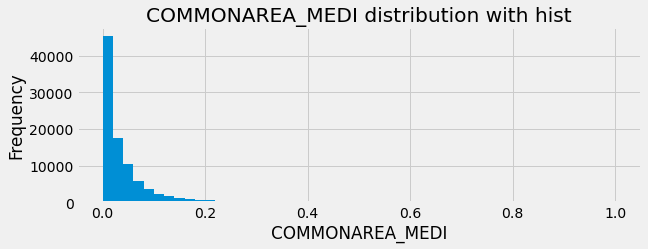

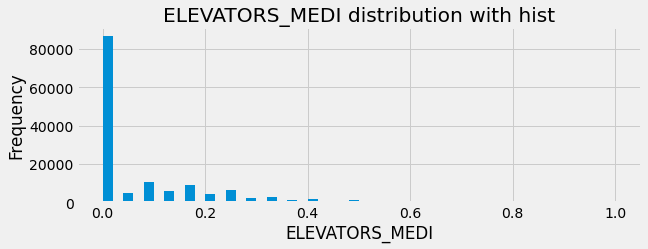

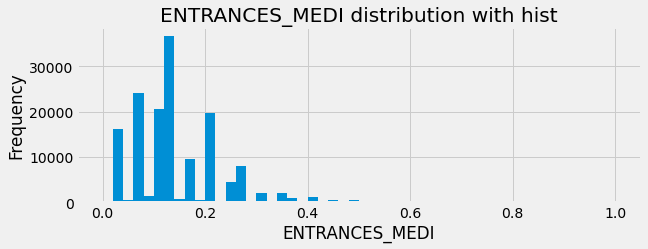

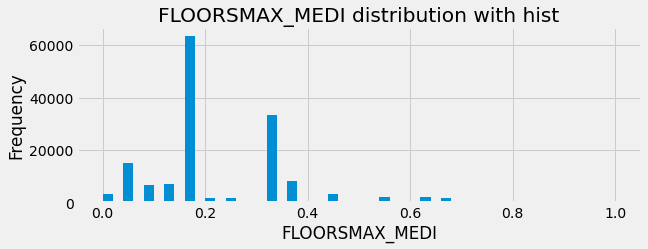

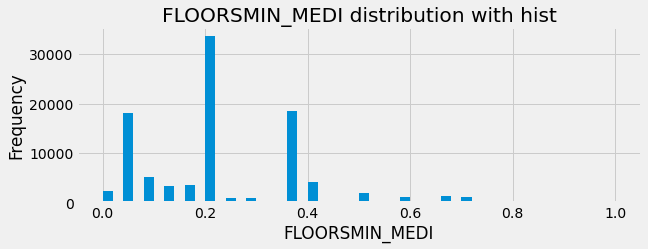

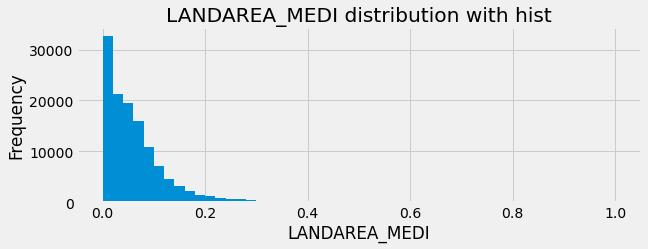

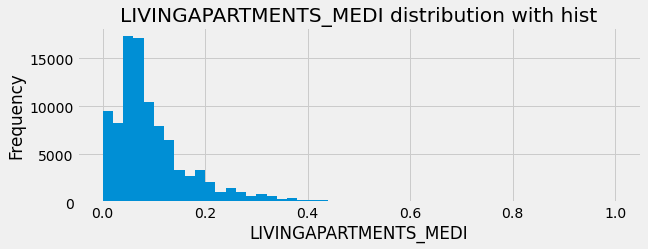

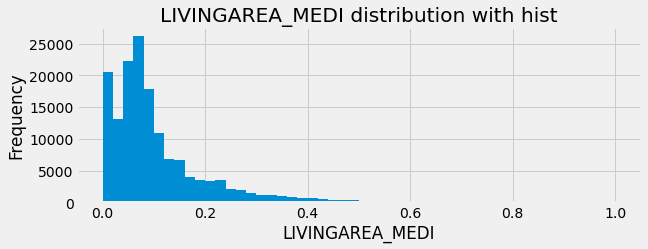

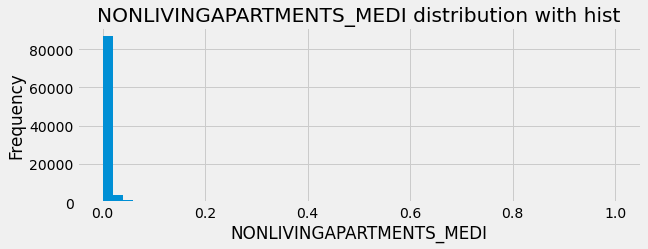

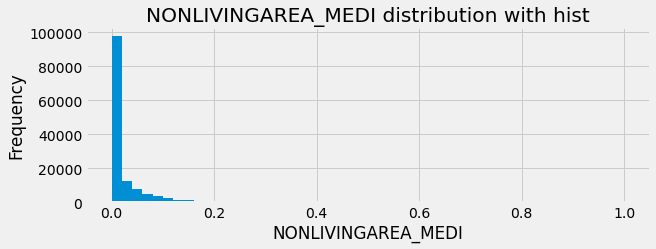

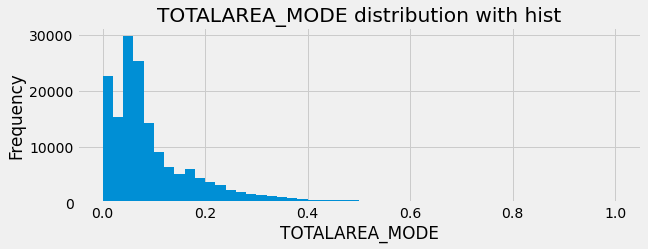

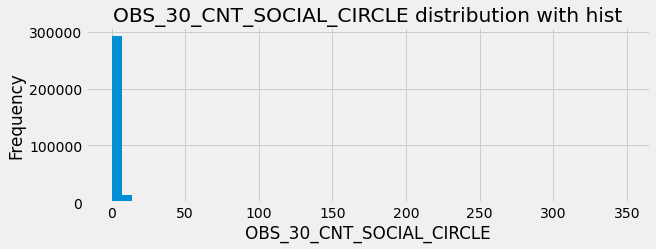

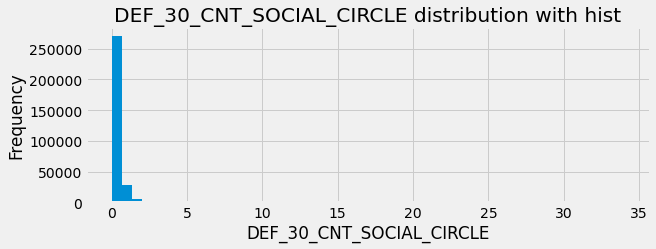

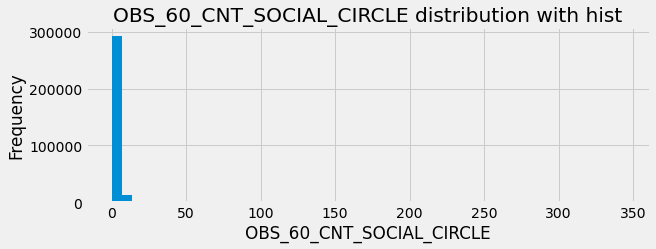

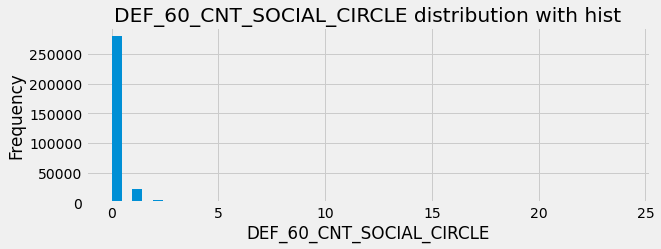

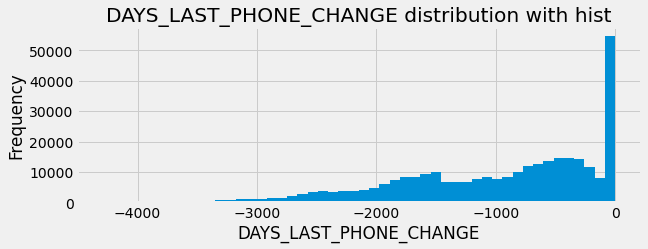

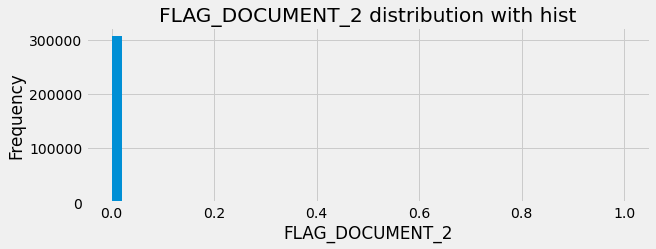

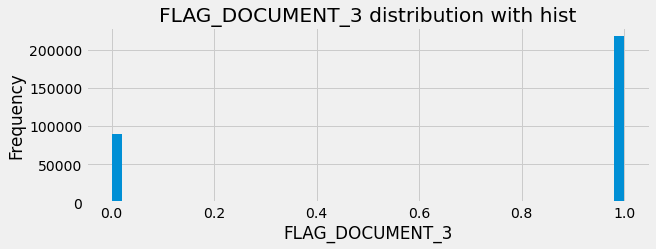

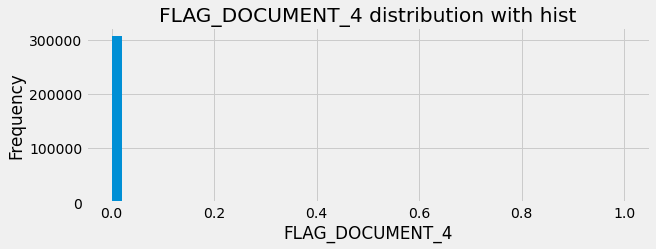

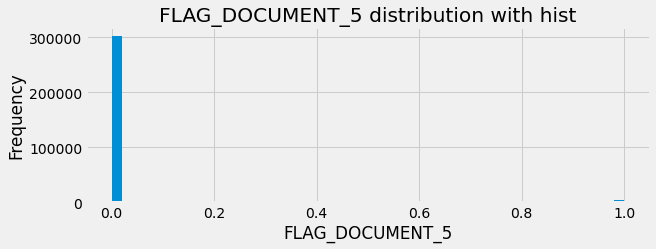

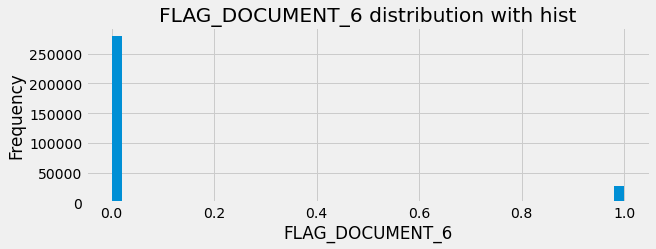

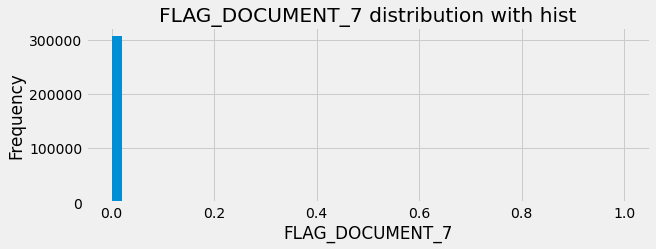

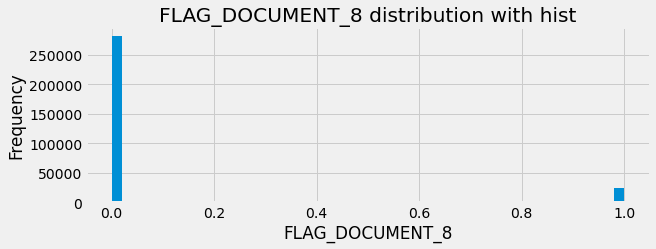

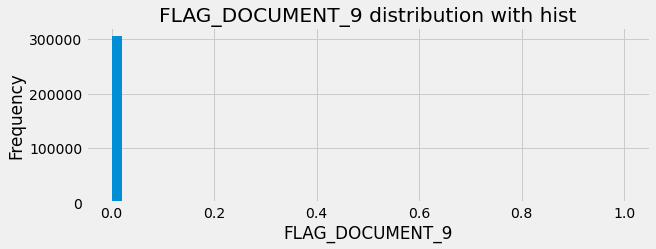

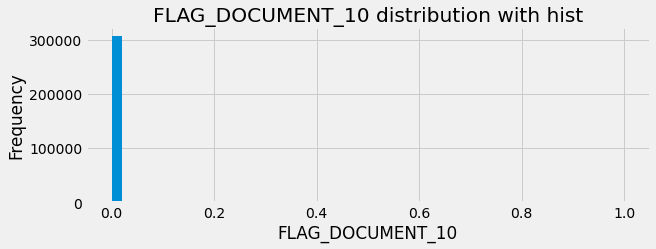

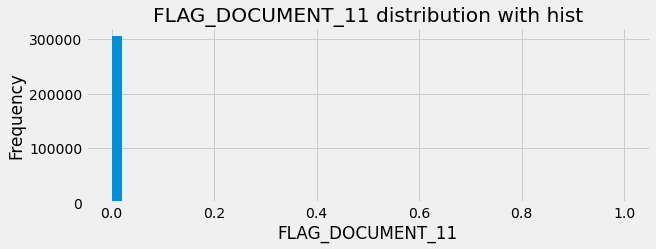

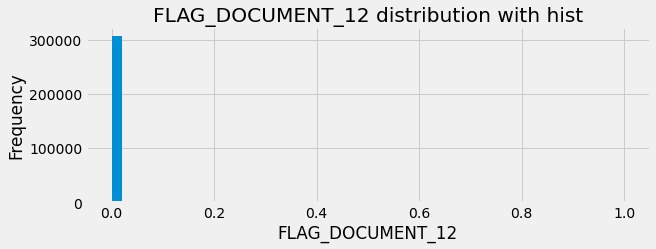

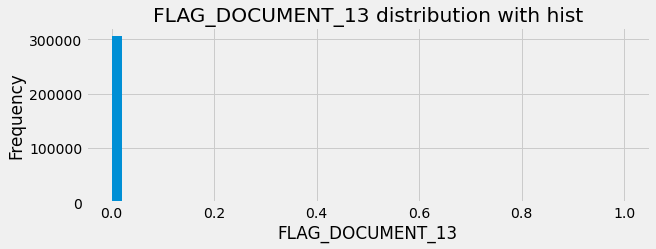

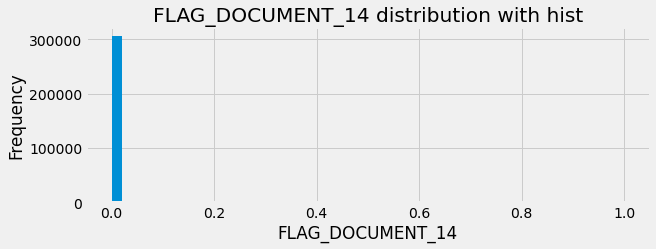

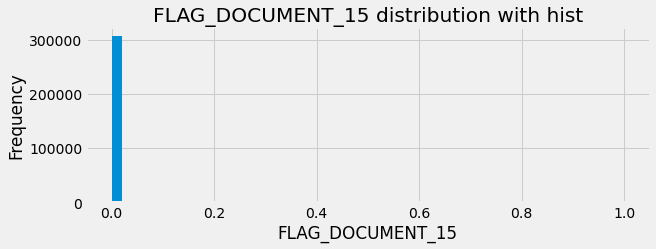

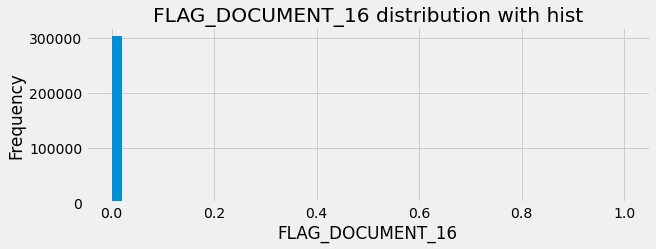

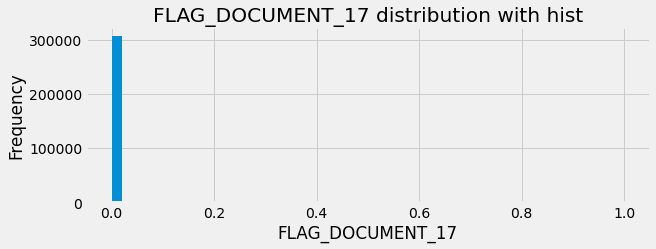

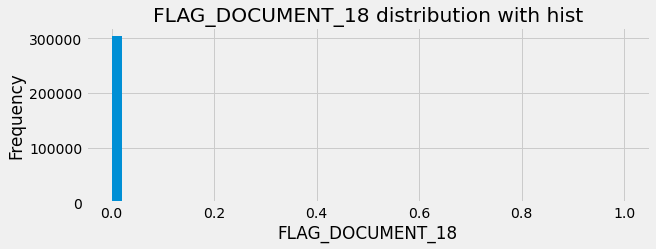

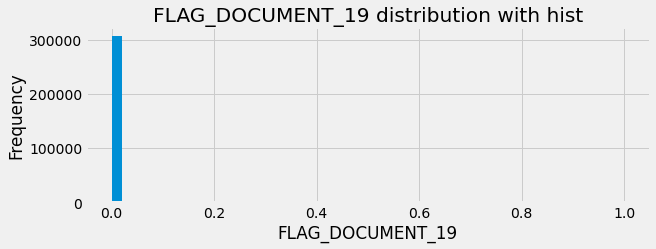

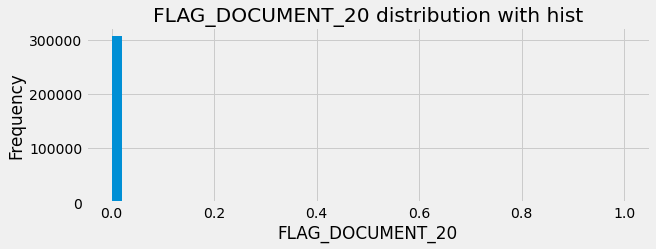

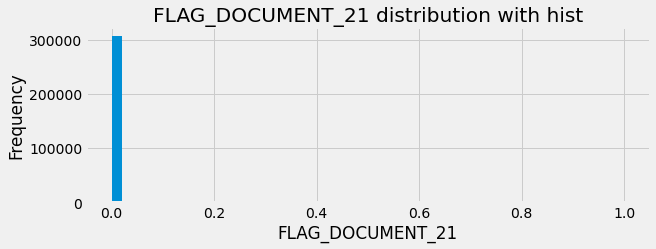

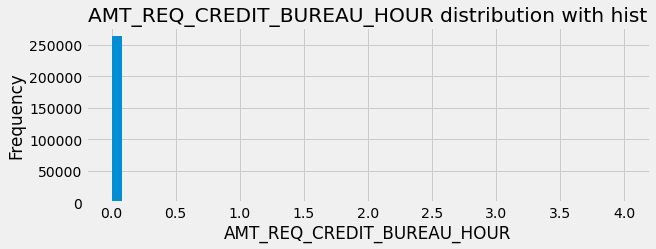

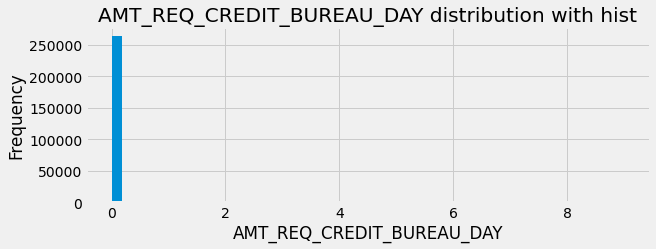

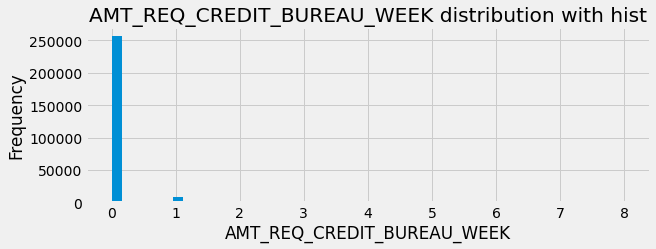

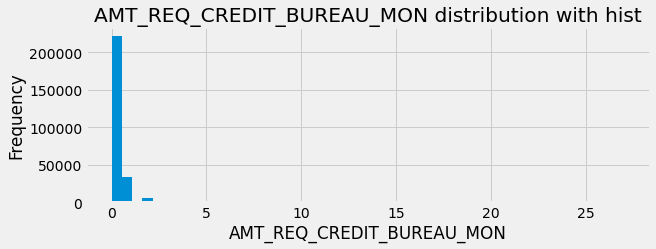

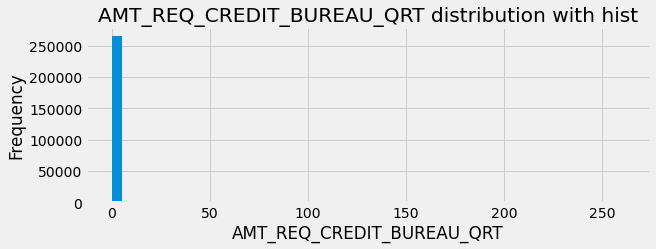

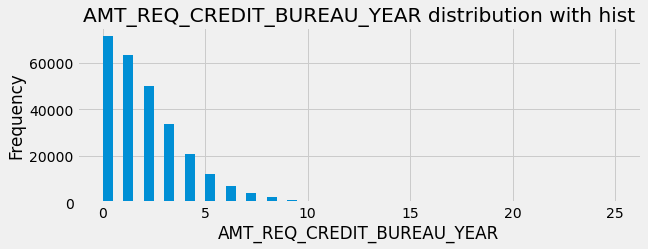

In [37]:
for n in numeric_cols:
    plot_hist(n)

### Anomality handling

In [38]:
#Checking information of "DAYS_EMPLOYED"
appli_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [39]:
anom = appli_train[appli_train['DAYS_EMPLOYED'] == 365243]
non_anom = appli_train[appli_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


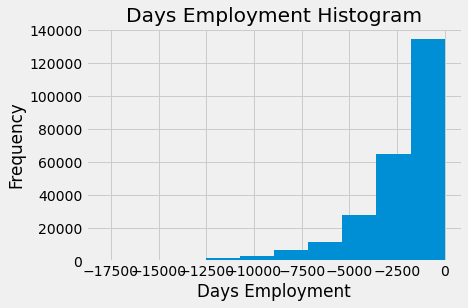

In [40]:
# Create an anomalous flag column
appli_train['DAYS_EMPLOYED_ANOM'] = appli_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
appli_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# Check values distribution after repalcement in train dataset
appli_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

### Find correlations


In [41]:
# Find correlations with the target and sort
correlations = appli_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


We can clearly see that column EXT_SOURCE_3, EXT_SOURCE_2 and EXT_SOURCE_1 was strongly negative correlated to the target variable 


## 3-B Bureau EDA

In [42]:
bureau.shape


(1716428, 17)

In [43]:
bureau.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1716428 non-null  int64  
 1   SK_ID_BUREAU            1716428 non-null  int64  
 2   CREDIT_ACTIVE           1716428 non-null  object 
 3   CREDIT_CURRENCY         1716428 non-null  object 
 4   DAYS_CREDIT             1716428 non-null  int64  
 5   CREDIT_DAY_OVERDUE      1716428 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     1610875 non-null  float64
 7   DAYS_ENDDATE_FACT       1082775 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  591940 non-null   float64
 9   CNT_CREDIT_PROLONG      1716428 non-null  int64  
 10  AMT_CREDIT_SUM          1716415 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     1458759 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    1124648 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  1716428 non-null  float64
 14  CR

In [44]:
#Missing Values
b_total = bureau.isnull().sum().sort_values(ascending = False)
b_percent = (bureau.isnull().sum()/bureau.isnull().count()*100).sort_values(ascending = False)
b_missing_val = pd.concat([b_total, b_percent], axis=1, keys=['Total', 'Percent'])

b_missing_val

Total    Percent
AMT_ANNUITY             1226791  71.473490
AMT_CREDIT_MAX_OVERDUE  1124488  65.513264
DAYS_ENDDATE_FACT        633653  36.916958
AMT_CREDIT_SUM_LIMIT     591780  34.477415
AMT_CREDIT_SUM_DEBT      257669  15.011932
DAYS_CREDIT_ENDDATE      105553   6.149573
AMT_CREDIT_SUM               13   0.000757
CREDIT_ACTIVE                 0   0.000000
CREDIT_CURRENCY               0   0.000000
DAYS_CREDIT                   0   0.000000
CREDIT_DAY_OVERDUE            0   0.000000
SK_ID_BUREAU                  0   0.000000
CNT_CREDIT_PROLONG            0   0.000000
AMT_CREDIT_SUM_OVERDUE        0   0.000000
CREDIT_TYPE                   0   0.000000
DAYS_CREDIT_UPDATE            0   0.000000
SK_ID_CURR                    0   0.000000

In [45]:
# Create function that counts the observations in each categorical bin using bars
def graph_objects(frame, hue=None):
    
    if hue is not None:
        hue = hue
        
    df = frame.dtypes
    df.index.name = 'columns'
    df = pd.DataFrame(df, columns=['dtype'])
    df = df.reset_index()
    df = df[df['dtype'] == 'object']
    list_objects = df['columns'].tolist()
    
    for obj in list_objects:
        plt.figure(figsize=(12,5))
        plot = sns.countplot(obj, data=frame, hue=hue)
        plt.xticks(rotation=60)

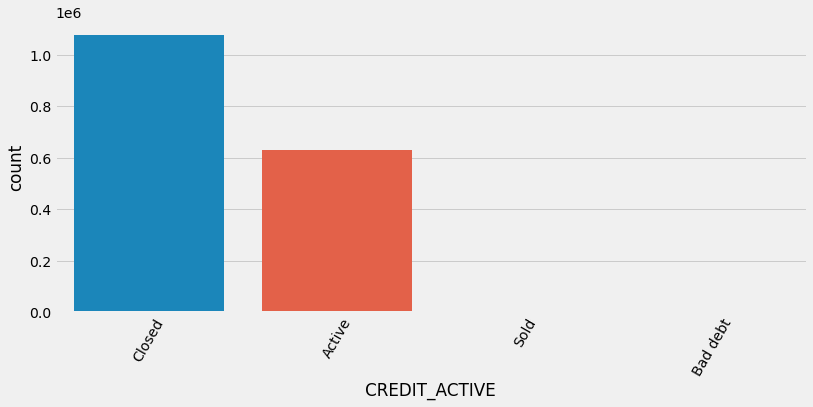

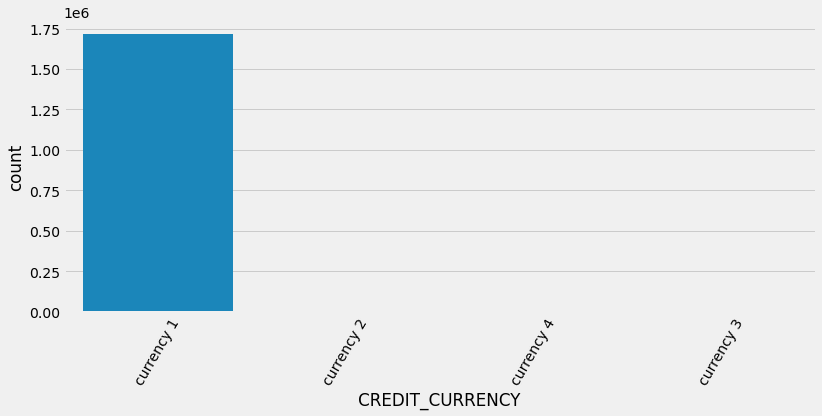

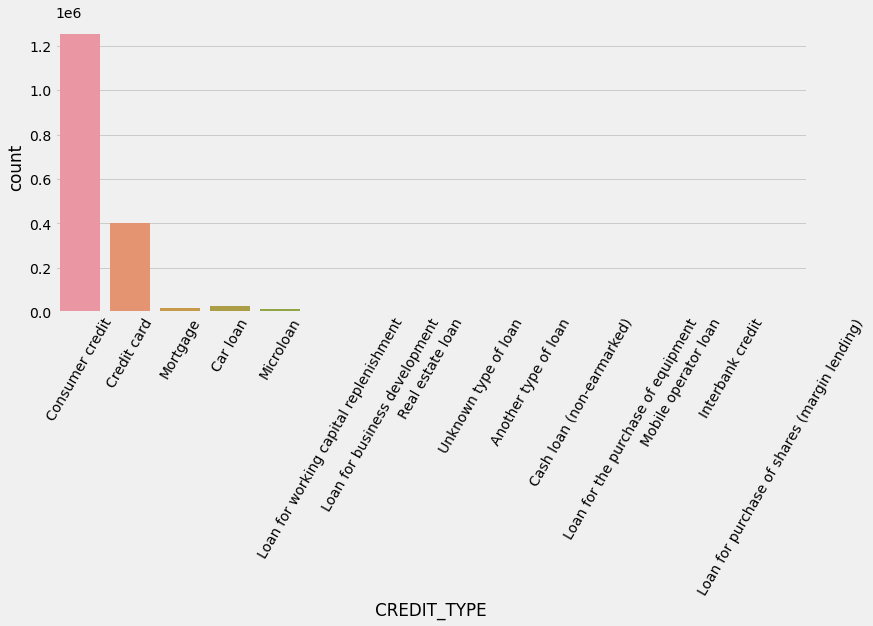

In [46]:
#Visualizing categorical data

graph_objects(bureau)

<Figure size 864x360 with 0 Axes>

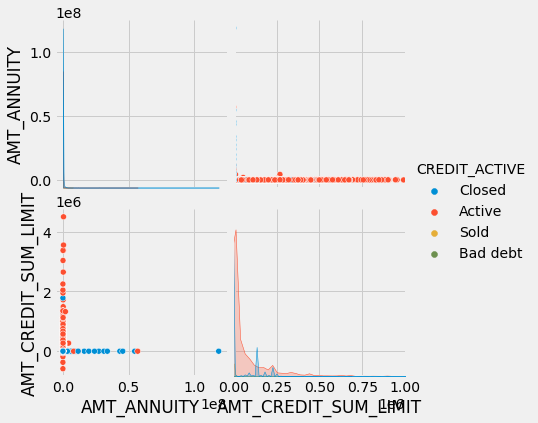

In [47]:
#Visualizing the relationships between AMT_ANNUITY,AMT_CREDIT_SUM_LIMIT Vs. CREDIT_ACTIVE
plt.figure(figsize=(12,5))
ax = sns.pairplot(bureau, vars = ['AMT_ANNUITY','AMT_CREDIT_SUM_LIMIT'], hue='CREDIT_ACTIVE', size=3);
plt.xlim((0,1000000))
plt.show()

AMT_ANNUITY and AMT_CREDIT_SUM_LIMIT do not have signficate relationshp.

<Figure size 864x360 with 0 Axes>

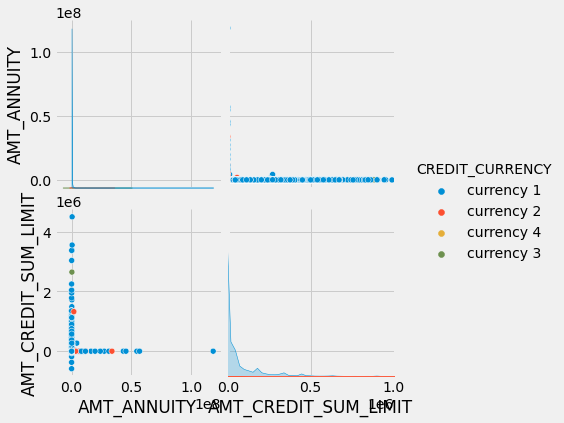

In [48]:
#Visualizing the relationships between AMT_ANNUITY,AMT_CREDIT_SUM_LIMIT Vs. CREDIT_CURRENCY
plt.figure(figsize=(12,5))
ax = sns.pairplot(bureau, vars = ['AMT_ANNUITY','AMT_CREDIT_SUM_LIMIT'], hue='CREDIT_CURRENCY', size=3);
plt.xlim((0,1000000))
plt.show()

AMT_ANNUITY and AMT_CREDIT_SUM_LIMIT do not have signficate replationshp.

<Figure size 864x360 with 0 Axes>

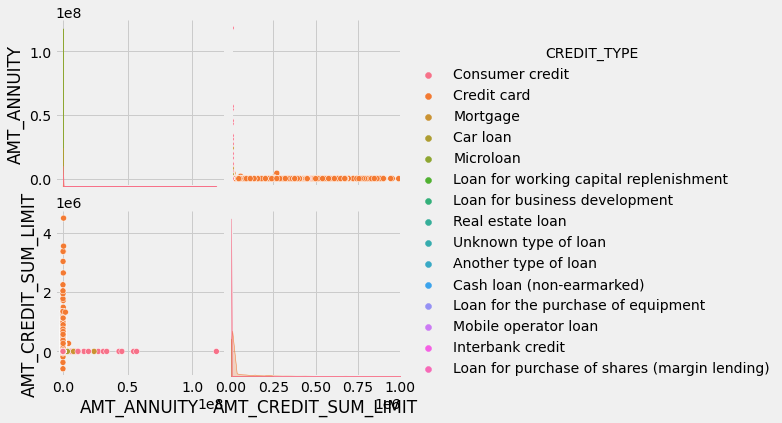

In [49]:
#Visualizing the relationships between AMT_ANNUITY,AMT_CREDIT_SUM_LIMIT Vs. CREDIT_TYPE
plt.figure(figsize=(12,5))
ax = sns.pairplot(bureau, vars = ['AMT_ANNUITY','AMT_CREDIT_SUM_LIMIT'], hue='CREDIT_TYPE', size=3);
plt.xlim((0,1000000))
plt.show()

AMT_ANNUITY and AMT_CREDIT_SUM_LIMIT do not have signficate replationshp.

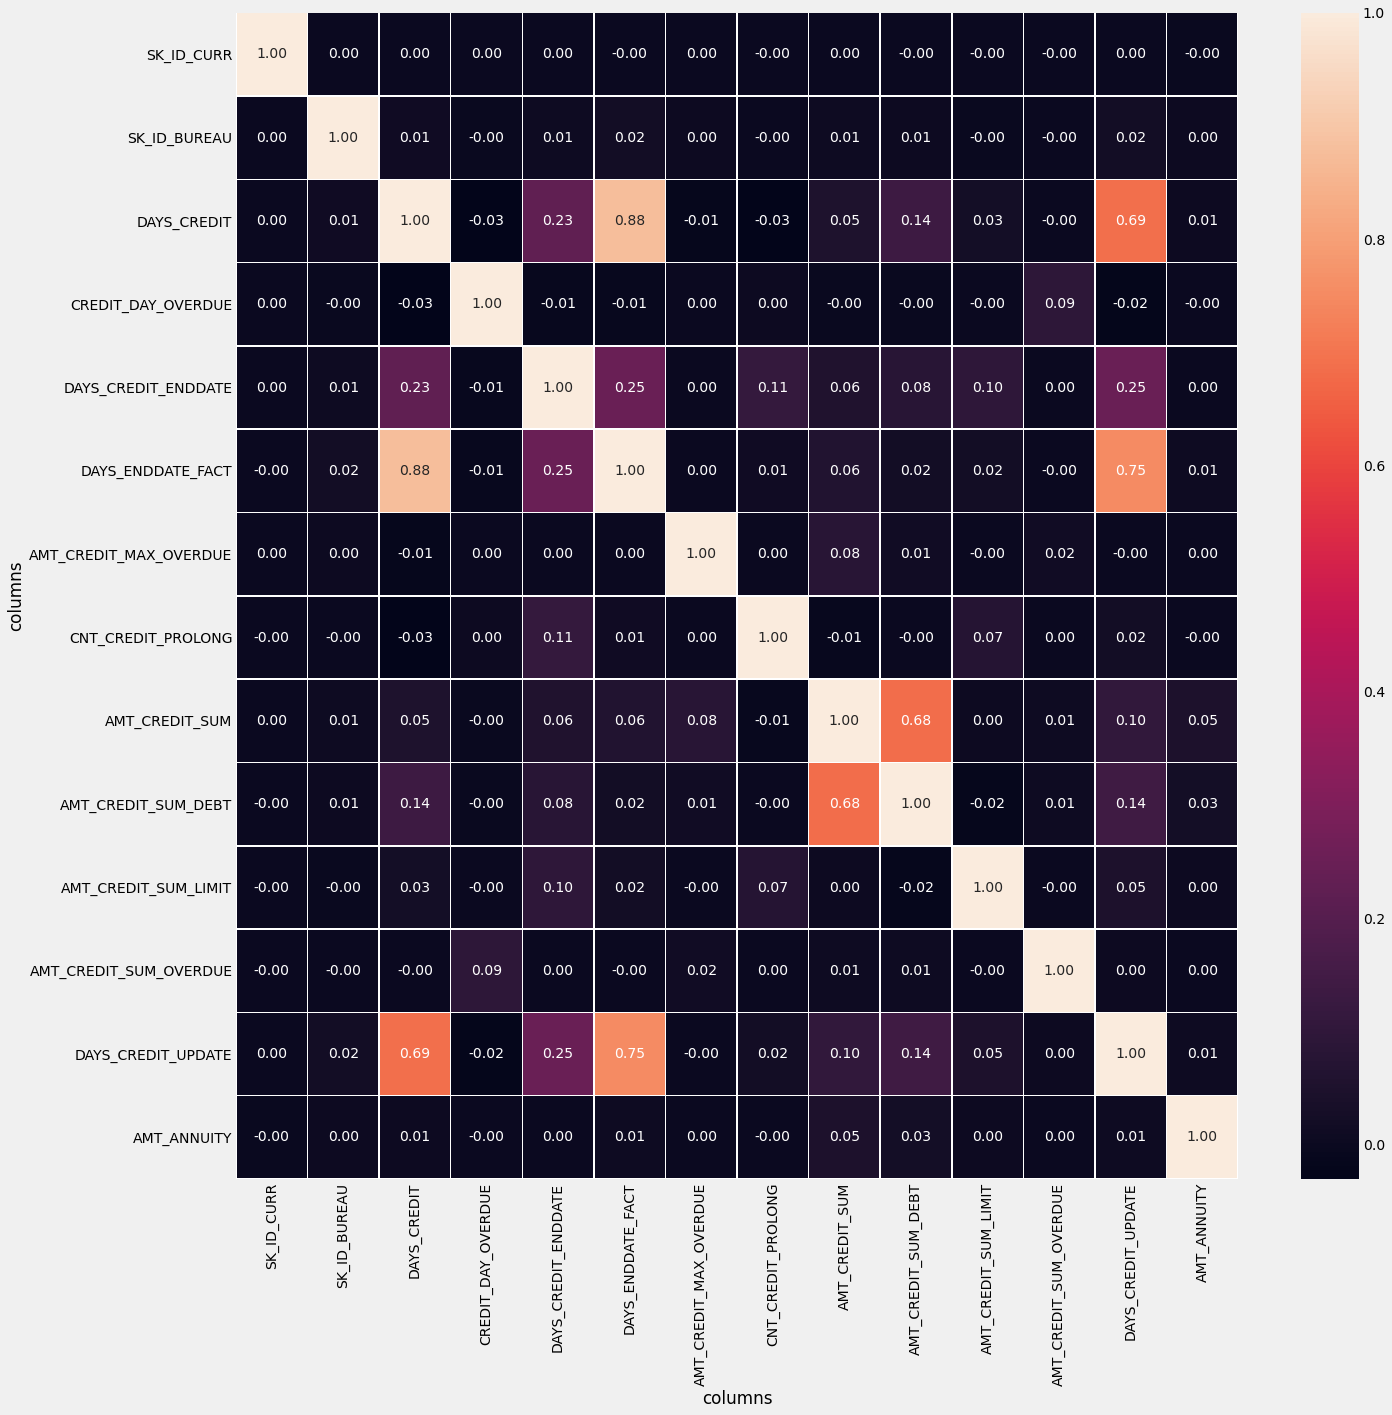

In [50]:
# Checking the Correlation 
fig, ax= plt.subplots(figsize = (20,20))
sns.heatmap(bureau.corr(), annot = True, fmt = ".2f", linewidths=.5, ax=ax)
plt.show()

## 3-C Bureau Balance EDA

In [51]:
bureau_bal.shape

(27299925, 3)

In [52]:
bureau_bal.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   SK_ID_BUREAU    27299925 non-null  int64 
 1   MONTHS_BALANCE  27299925 non-null  int64 
 2   STATUS          27299925 non-null  object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [53]:
#Missing Values
b_bal_total = bureau_bal.isnull().sum().sort_values(ascending = False)
b_bal_percent = (bureau_bal.isnull().sum()/bureau_bal.isnull().count()*100).sort_values(ascending = False)
b_bal_missing_val = pd.concat([b_bal_total, b_bal_percent], axis=1, keys=['Total', 'Percent'])

b_bal_missing_val

Total  Percent
SK_ID_BUREAU        0      0.0
MONTHS_BALANCE      0      0.0
STATUS              0      0.0

No Missing data

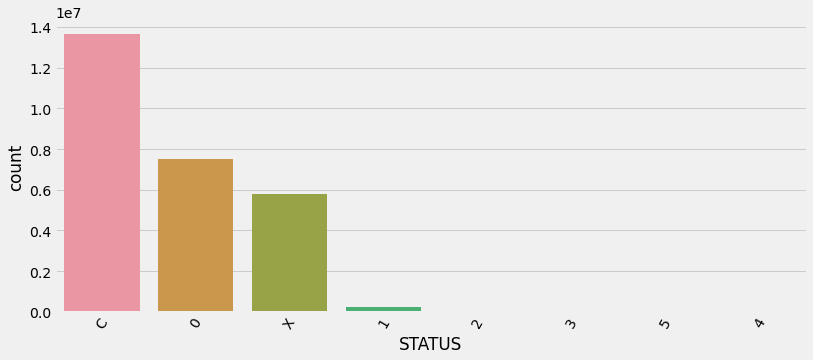

In [54]:
#Visualizing Categorical data

graph_objects(bureau_bal)

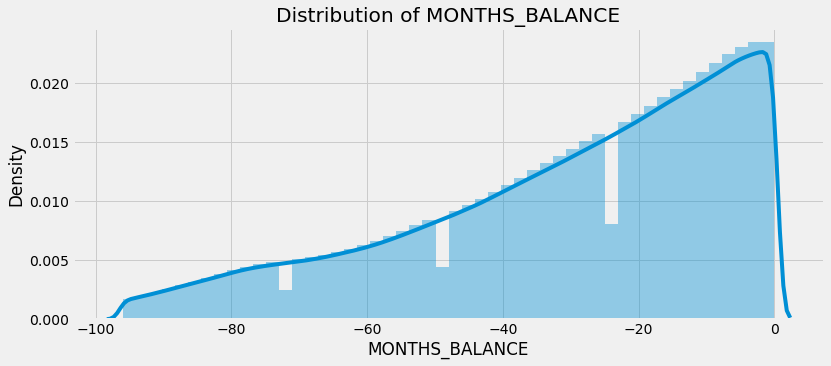

In [55]:
#Show MONTHS_BALANCE Distribution in bureau balance Data
plt.figure(figsize=(12,5))
plt.title("Distribution of MONTHS_BALANCE")
ax = sns.distplot(bureau_bal.MONTHS_BALANCE.dropna())
plt.show()

MONTHS_BALANCE is inconsistent since the data includes negative values.

<Figure size 864x360 with 0 Axes>

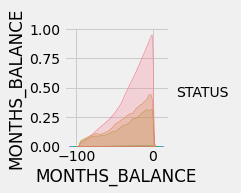

In [56]:
#Visualizing the relationships between MONTHS_BALANCE Vs. STATUS
plt.figure(figsize=(12,5))
ax = sns.pairplot(bureau_bal, vars = ['MONTHS_BALANCE'],hue='STATUS');
plt.show()

MONTHS_BALANCE and STATUS are highly correlated.

## 3-D Credit Card Balance EDA

In [57]:
credit_card_bal.shape

(3840312, 23)

In [58]:
credit_card_bal.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_PREV                  3840312 non-null  int64  
 1   SK_ID_CURR                  3840312 non-null  int64  
 2   MONTHS_BALANCE              3840312 non-null  int64  
 3   AMT_BALANCE                 3840312 non-null  float64
 4   AMT_CREDIT_LIMIT_ACTUAL     3840312 non-null  int64  
 5   AMT_DRAWINGS_ATM_CURRENT    3090496 non-null  float64
 6   AMT_DRAWINGS_CURRENT        3840312 non-null  float64
 7   AMT_DRAWINGS_OTHER_CURRENT  3090496 non-null  float64
 8   AMT_DRAWINGS_POS_CURRENT    3090496 non-null  float64
 9   AMT_INST_MIN_REGULARITY     3535076 non-null  float64
 10  AMT_PAYMENT_CURRENT         3072324 non-null  float64
 11  AMT_PAYMENT_TOTAL_CURRENT   3840312 non-null  float64
 12  AMT_RECEIVABLE_PRINCIPAL    3840312 non-null  float64
 1

In [59]:
#Missing Values
credit_bal_total = credit_card_bal.isnull().sum().sort_values(ascending = False)
credit_bal_percent = (credit_card_bal.isnull().sum()/credit_card_bal.isnull().count()*100).sort_values(ascending = False)
credit_bal_missing_val = pd.concat([credit_bal_total, credit_bal_percent], axis=1, keys=['Total', 'Percent'])

credit_bal_missing_val

Total    Percent
AMT_PAYMENT_CURRENT         767988  19.998063
AMT_DRAWINGS_ATM_CURRENT    749816  19.524872
CNT_DRAWINGS_POS_CURRENT    749816  19.524872
AMT_DRAWINGS_OTHER_CURRENT  749816  19.524872
AMT_DRAWINGS_POS_CURRENT    749816  19.524872
CNT_DRAWINGS_OTHER_CURRENT  749816  19.524872
CNT_DRAWINGS_ATM_CURRENT    749816  19.524872
CNT_INSTALMENT_MATURE_CUM   305236   7.948208
AMT_INST_MIN_REGULARITY     305236   7.948208
SK_ID_PREV                       0   0.000000
AMT_TOTAL_RECEIVABLE             0   0.000000
SK_DPD                           0   0.000000
NAME_CONTRACT_STATUS             0   0.000000
CNT_DRAWINGS_CURRENT             0   0.000000
AMT_PAYMENT_TOTAL_CURRENT        0   0.000000
AMT_RECIVABLE                    0   0.000000
AMT_RECEIVABLE_PRINCIPAL         0   0.000000
SK_ID_CURR                       0   0.000000
AMT_DRAWINGS_CURRENT             0   0.000000
AMT_CREDIT_LIMIT_ACTUAL          0   0.000000
AMT_BALANCE                      0   0.000000
MONTHS_BALANCE                   0   0.000000
SK_DPD_DEF                       0   0.000000

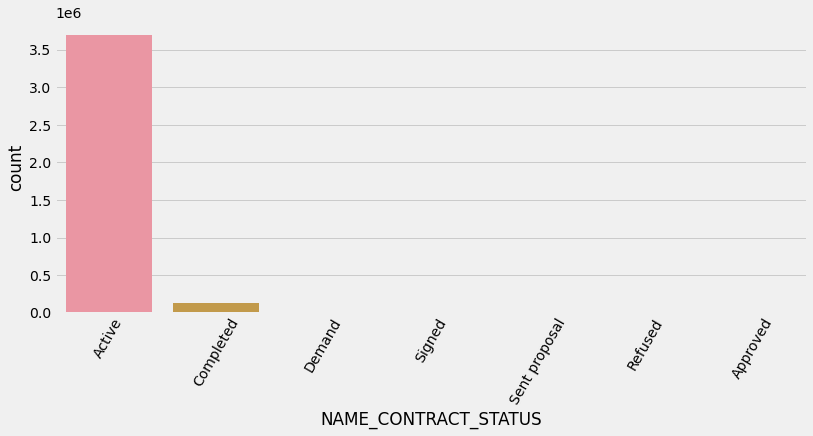

In [60]:
# Visualizing Categorical Data

graph_objects(credit_card_bal)

<Figure size 1296x360 with 0 Axes>

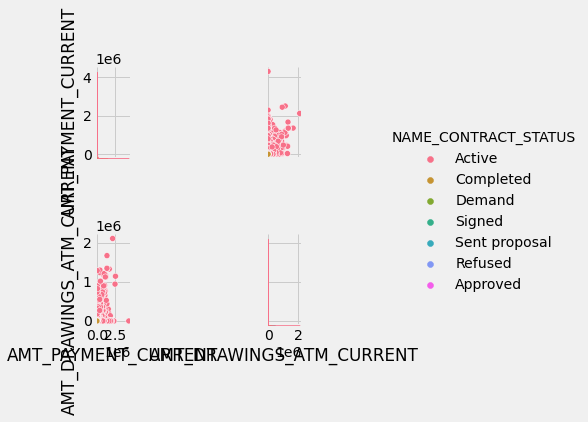

In [61]:
#Visualizing the relationships between AMT_PAYMENT_CURRENT and AMT_DRAWINGS_ATM_CURRENT Vs. NAME_CONTRACT_STATUS
plt.figure(figsize=(18,5))
ax = sns.pairplot(credit_card_bal, vars = ['AMT_PAYMENT_CURRENT','AMT_DRAWINGS_ATM_CURRENT'], hue='NAME_CONTRACT_STATUS');
plt.show()

AMT_PAYMENT_CURRENT and AMT_DRAWINGS_ATM_CURRENT do not have signficate replationshp.

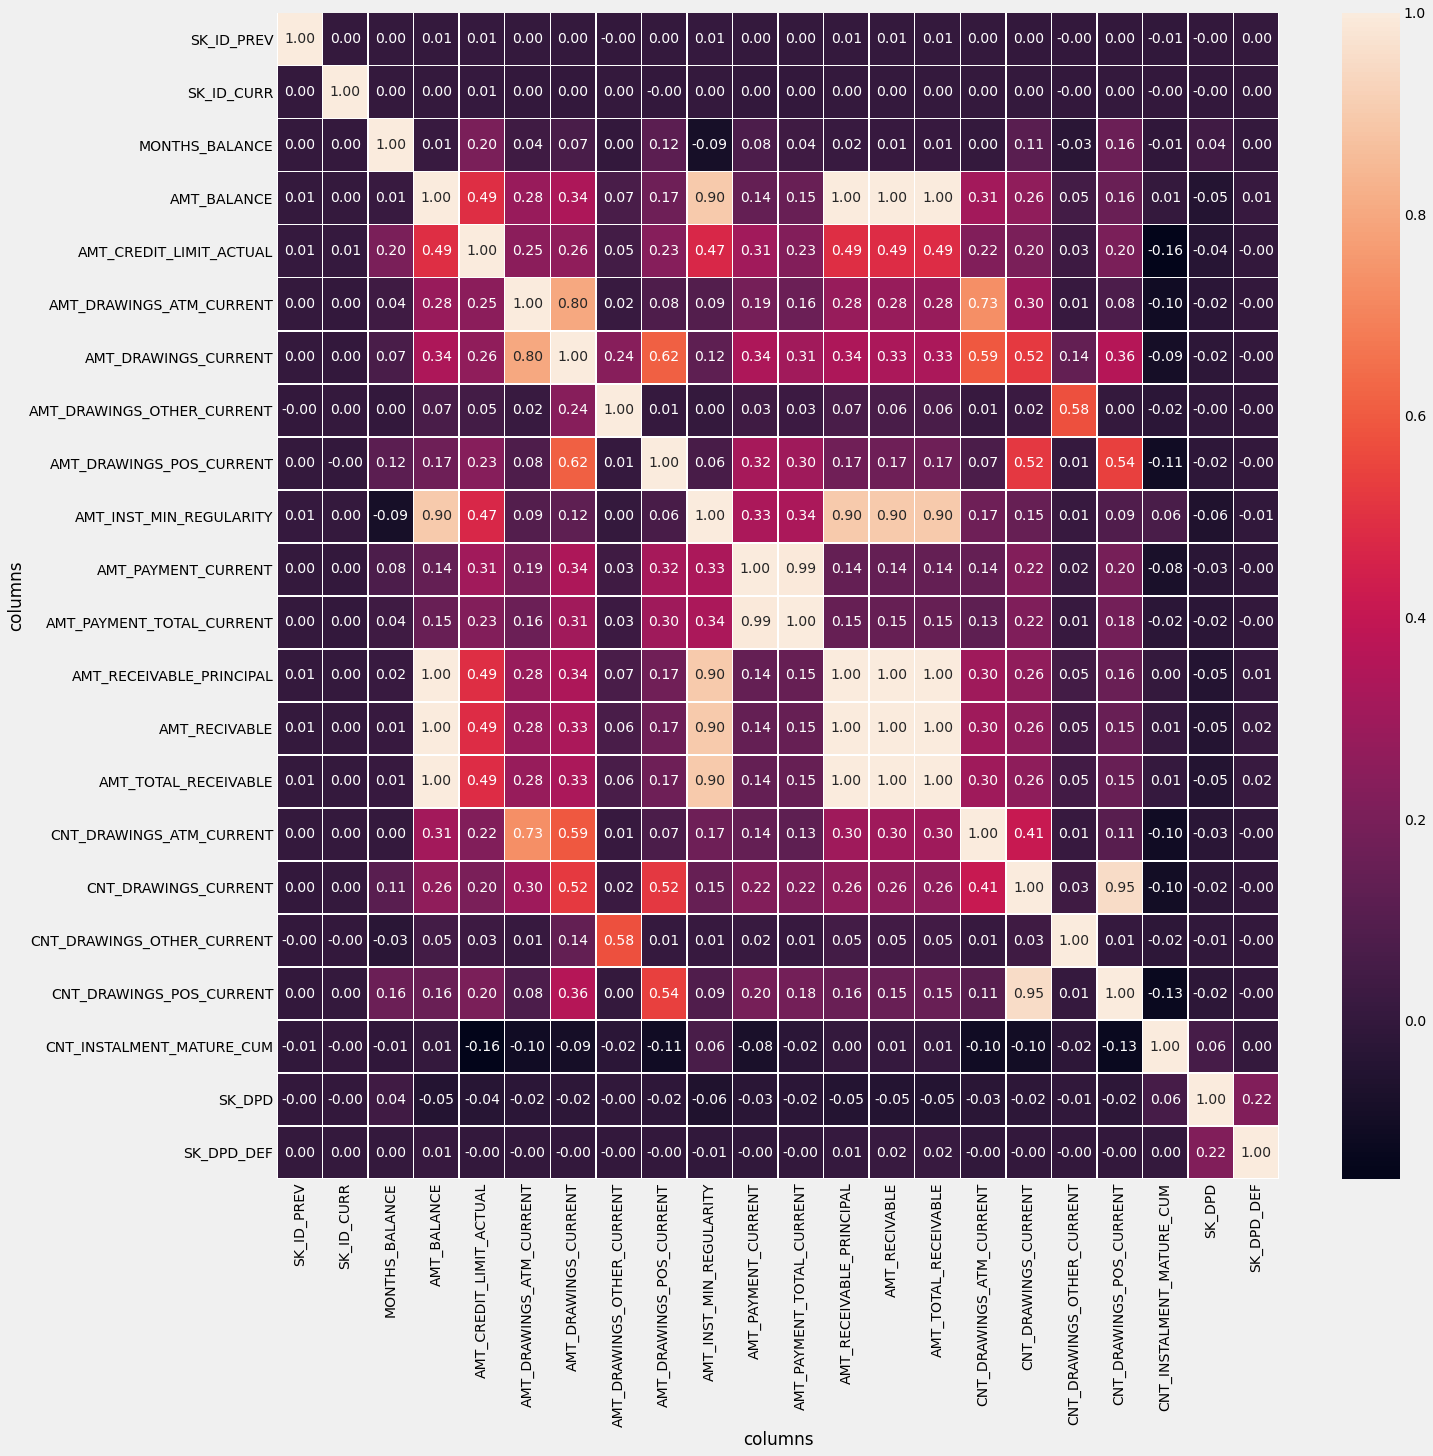

In [62]:
# Checking the Correlation 
fig, ax= plt.subplots(figsize = (20,20))
sns.heatmap(credit_card_bal.corr(), annot = True, fmt = ".2f", linewidths=.5, ax=ax)
plt.show()

## 3-E Installments Payments EDA

In [63]:
installment.shape

(13605401, 8)

In [64]:
installment.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Non-Null Count     Dtype  
---  ------                  --------------     -----  
 0   SK_ID_PREV              13605401 non-null  int64  
 1   SK_ID_CURR              13605401 non-null  int64  
 2   NUM_INSTALMENT_VERSION  13605401 non-null  float64
 3   NUM_INSTALMENT_NUMBER   13605401 non-null  int64  
 4   DAYS_INSTALMENT         13605401 non-null  float64
 5   DAYS_ENTRY_PAYMENT      13602496 non-null  float64
 6   AMT_INSTALMENT          13605401 non-null  float64
 7   AMT_PAYMENT             13602496 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [65]:
#Missing Values

installment_total = installment.isnull().sum().sort_values(ascending = False)
installment_percent = (installment.isnull().sum()/installment.isnull().count()*100).sort_values(ascending = False)
installment_missing_val = pd.concat([installment_total, installment_percent], axis=1, keys=['Total', 'Percent'])

installment_missing_val

Total   Percent
DAYS_ENTRY_PAYMENT       2905  0.021352
AMT_PAYMENT              2905  0.021352
SK_ID_PREV                  0  0.000000
SK_ID_CURR                  0  0.000000
NUM_INSTALMENT_VERSION      0  0.000000
NUM_INSTALMENT_NUMBER       0  0.000000
DAYS_INSTALMENT             0  0.000000
AMT_INSTALMENT              0  0.000000

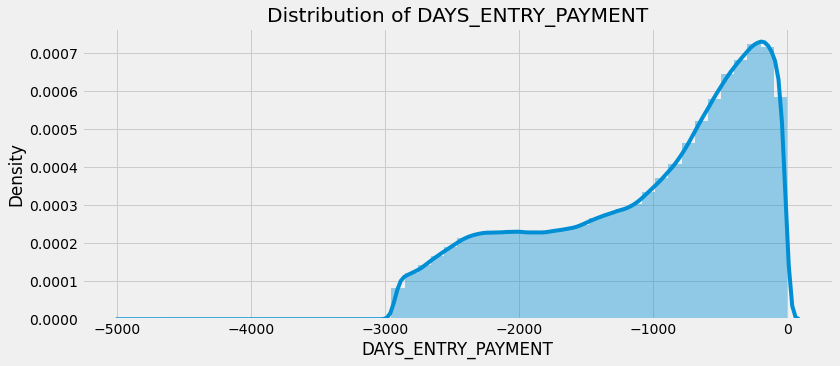

In [66]:
#Show DAYS_ENTRY_PAYMENT Distribution in installements payments Data
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_ENTRY_PAYMENT")
ax = sns.distplot(installment.DAYS_ENTRY_PAYMENT.dropna())
plt.show()

DAYS_ENTRY_PAYMENTS is inconsistent since the data includes negative values.

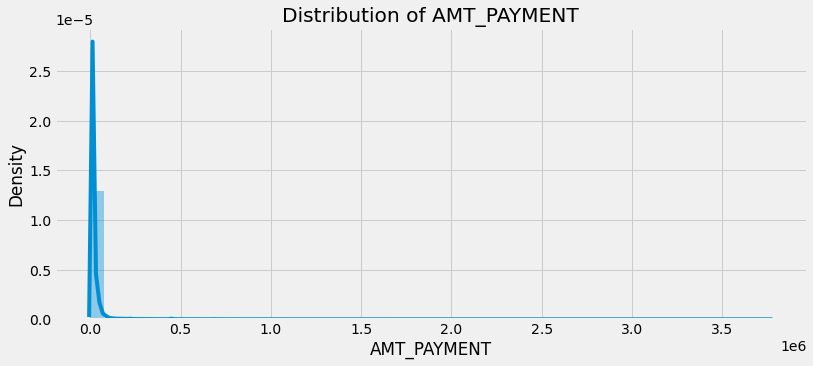

In [67]:
#Show AMT_PAYMENT Distribution in installements payments Data
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_PAYMENT")
ax = sns.distplot(installment.AMT_PAYMENT.dropna())
plt.show()

AMT_PAYMENT has close to 0 payments.

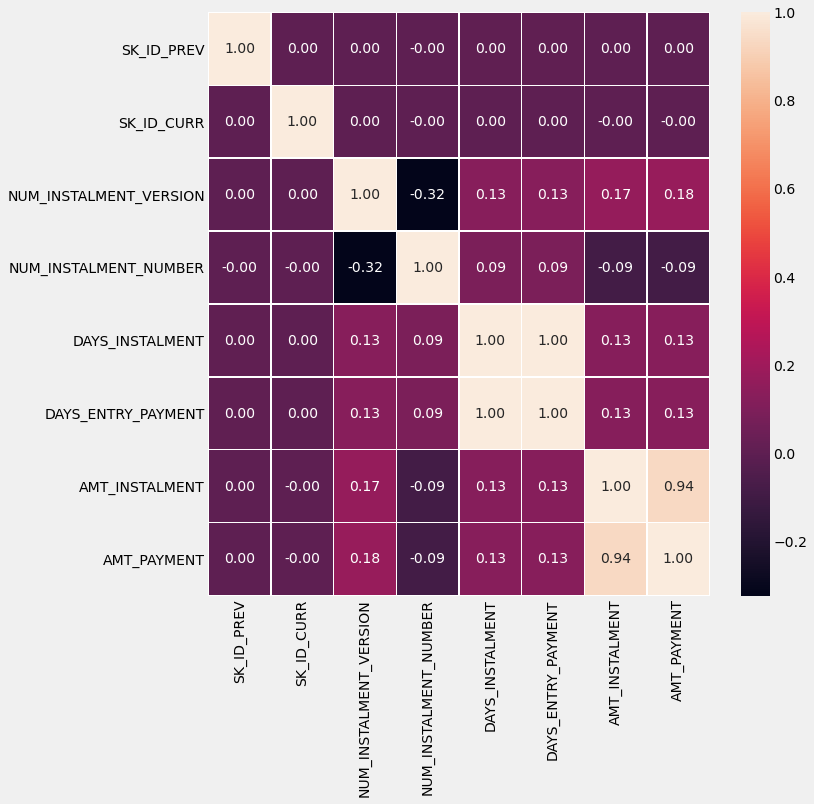

In [68]:
# Checking the Correlation 
fig, ax= plt.subplots(figsize = (10,10))
sns.heatmap(installment.corr(), annot = True, fmt = ".2f", linewidths=.5, ax=ax)
plt.show()

## 3-F POS CASH BALANCE EDA

In [69]:
pos_bal.shape

(10001358, 8)

In [70]:
pos_bal.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Non-Null Count     Dtype  
---  ------                 --------------     -----  
 0   SK_ID_PREV             10001358 non-null  int64  
 1   SK_ID_CURR             10001358 non-null  int64  
 2   MONTHS_BALANCE         10001358 non-null  int64  
 3   CNT_INSTALMENT         9975287 non-null   float64
 4   CNT_INSTALMENT_FUTURE  9975271 non-null   float64
 5   NAME_CONTRACT_STATUS   10001358 non-null  object 
 6   SK_DPD                 10001358 non-null  int64  
 7   SK_DPD_DEF             10001358 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [71]:
#Missing Values

pos_bal_total = pos_bal.isnull().sum().sort_values(ascending = False)
pos_bal_percent = (pos_bal.isnull().sum()/pos_bal.isnull().count()*100).sort_values(ascending = False)
pos_bal_missing_val = pd.concat([pos_bal_total, pos_bal_percent], axis=1, keys=['Total', 'Percent'])

pos_bal_missing_val

Total   Percent
CNT_INSTALMENT_FUTURE  26087  0.260835
CNT_INSTALMENT         26071  0.260675
SK_ID_PREV                 0  0.000000
SK_ID_CURR                 0  0.000000
MONTHS_BALANCE             0  0.000000
NAME_CONTRACT_STATUS       0  0.000000
SK_DPD                     0  0.000000
SK_DPD_DEF                 0  0.000000

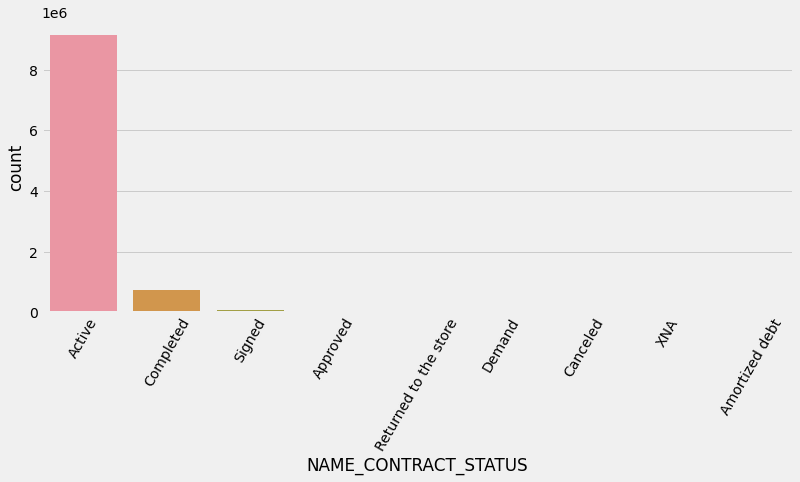

In [72]:
# Visualizing Categorical Data

graph_objects(pos_bal)

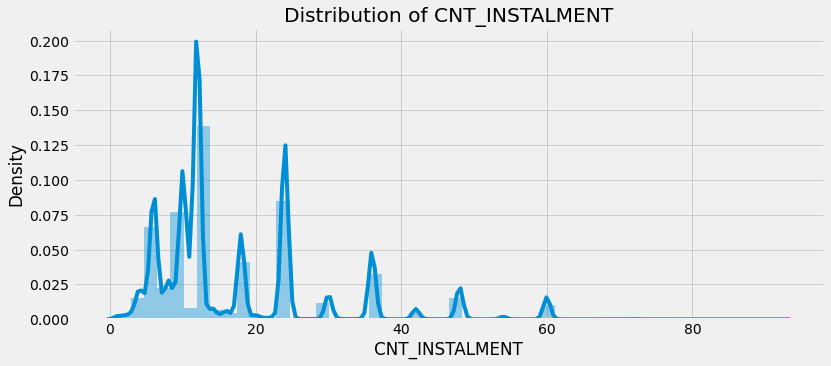

In [73]:
# Distribution of CNT_INSTALNENT in POS_CASH data
plt.figure(figsize=(12,5))
plt.title("Distribution of CNT_INSTALMENT")
ax = sns.distplot(pos_bal.CNT_INSTALMENT.dropna())
plt.show()

Most of the CNT_INSTALMENT payments falls in the 0-15 bracket.

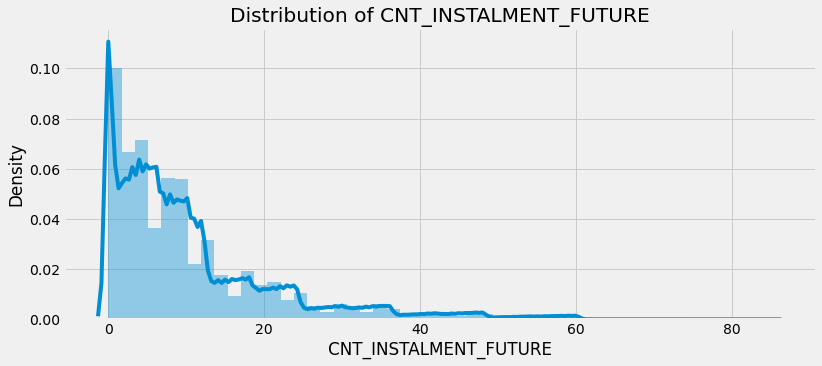

In [74]:
# Distribution of CNT_INSTALMENT_FURURE in POS_CASH data
plt.figure(figsize=(12,5))
plt.title("Distribution of CNT_INSTALMENT_FUTURE")
ax = sns.distplot(pos_bal.CNT_INSTALMENT_FUTURE.dropna())
plt.show()

Most of the CNT_INSTALMENT_FUTURE payments falls in the  0-20 bracket

<Figure size 864x360 with 0 Axes>

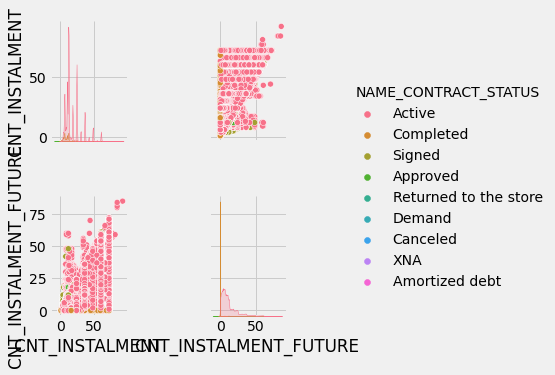

In [75]:
#Visualizing the relationships between CNT_INSTALMENT and CNT_INSTALMENT_FUTRUE Vs. NAME_CONTRACT_STATUS
plt.figure(figsize=(12,5))
sns.pairplot(pos_bal, vars = ['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE'], hue='NAME_CONTRACT_STATUS');
plt.show()

CNT_INSTALMENT and CNT_INSTALMENT_FUTURE are highly correlated with a postive linear slope

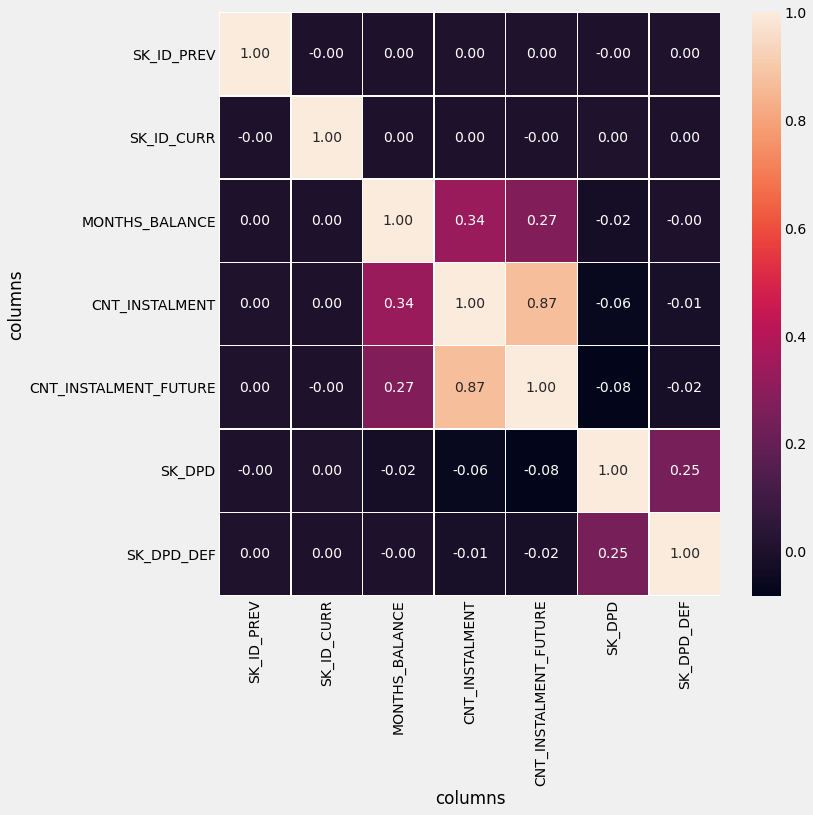

In [76]:
# Checking the Correlation 
fig, ax= plt.subplots(figsize = (10,10))
sns.heatmap(pos_bal.corr(), annot = True, fmt = ".2f", linewidths=.5, ax=ax)
plt.show()

## 3-G Previous Appliations EDA

In [77]:
prev_appli.shape

(1670214, 37)

In [78]:
prev_appli.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [79]:
#Missing Values

prev_appli_total = prev_appli.isnull().sum().sort_values(ascending = False)
prev_appli_percent = (prev_appli.isnull().sum()/prev_appli.isnull().count()*100).sort_values(ascending = False)
prev_appli_missing_val = pd.concat([prev_appli_total, prev_appli_percent], axis=1, keys=['Total', 'Percent'])

prev_appli_missing_val

Total    Percent
RATE_INTEREST_PRIVILEGED     1664263  99.643698
RATE_INTEREST_PRIMARY        1664263  99.643698
AMT_DOWN_PAYMENT              895844  53.636480
RATE_DOWN_PAYMENT             895844  53.636480
NAME_TYPE_SUITE               820405  49.119754
NFLAG_INSURED_ON_APPROVAL     673065  40.298129
DAYS_TERMINATION              673065  40.298129
DAYS_LAST_DUE                 673065  40.298129
DAYS_LAST_DUE_1ST_VERSION     673065  40.298129
DAYS_FIRST_DUE                673065  40.298129
DAYS_FIRST_DRAWING            673065  40.298129
AMT_GOODS_PRICE               385515  23.081773
AMT_ANNUITY                   372235  22.286665
CNT_PAYMENT                   372230  22.286366
PRODUCT_COMBINATION              346   0.020716
AMT_CREDIT                         1   0.000060
NAME_YIELD_GROUP                   0   0.000000
NAME_PORTFOLIO                     0   0.000000
NAME_SELLER_INDUSTRY               0   0.000000
SELLERPLACE_AREA                   0   0.000000
CHANNEL_TYPE                       0   0.000000
NAME_PRODUCT_TYPE                  0   0.000000
SK_ID_PREV                         0   0.000000
NAME_GOODS_CATEGORY                0   0.000000
NAME_CLIENT_TYPE                   0   0.000000
CODE_REJECT_REASON                 0   0.000000
SK_ID_CURR                         0   0.000000
DAYS_DECISION                      0   0.000000
NAME_CONTRACT_STATUS               0   0.000000
NAME_CASH_LOAN_PURPOSE             0   0.000000
NFLAG_LAST_APPL_IN_DAY             0   0.000000
FLAG_LAST_APPL_PER_CONTRACT        0   0.000000
HOUR_APPR_PROCESS_START            0   0.000000
WEEKDAY_APPR_PROCESS_START         0   0.000000
AMT_APPLICATION                    0   0.000000
NAME_CONTRACT_TYPE                 0   0.000000
NAME_PAYMENT_TYPE                  0   0.000000

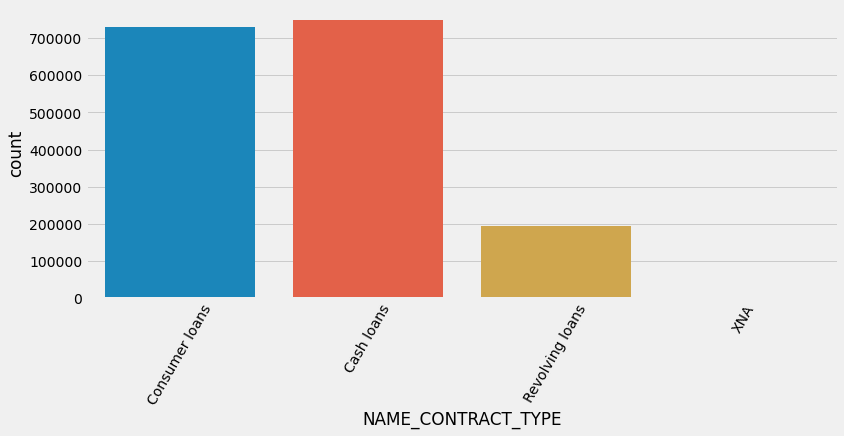

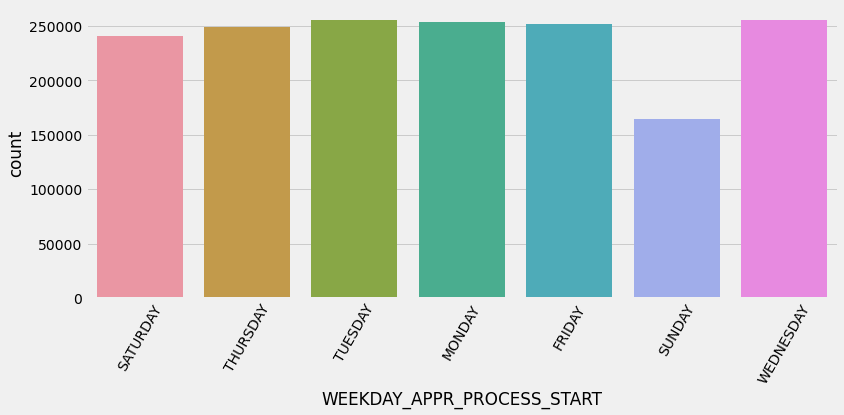

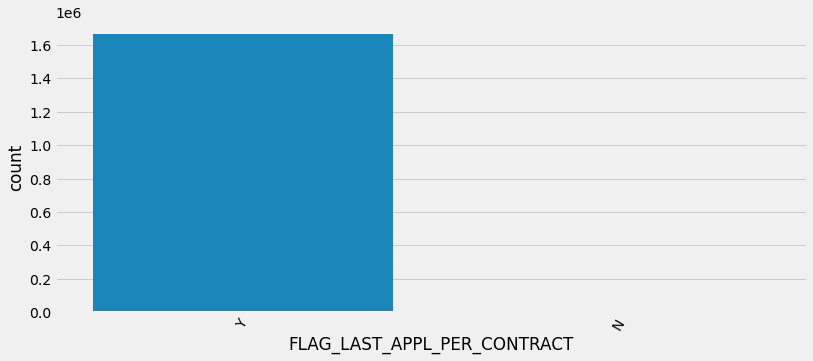

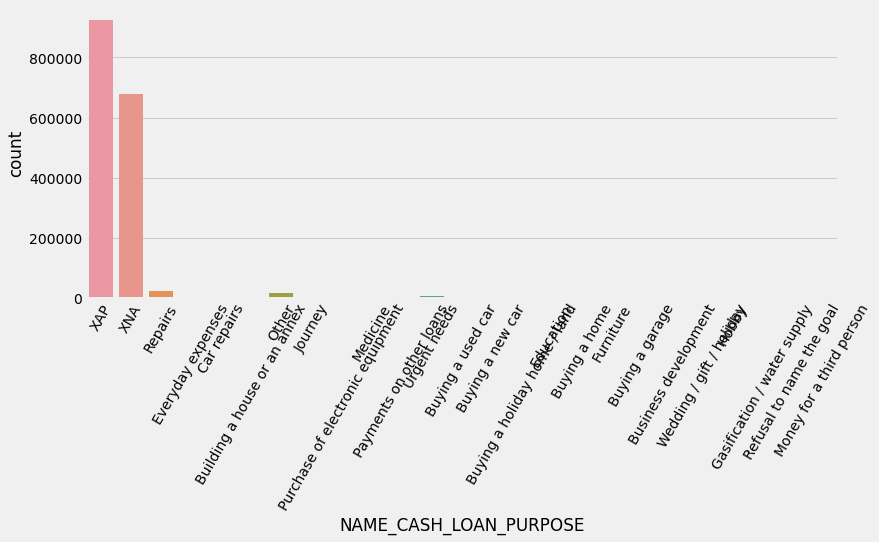

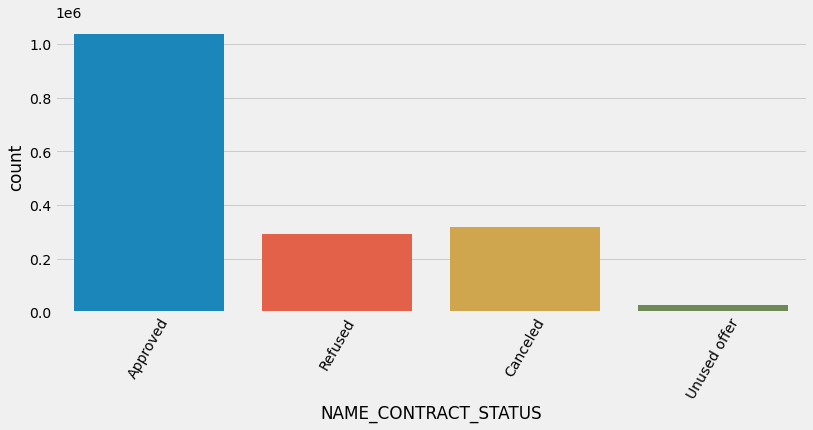

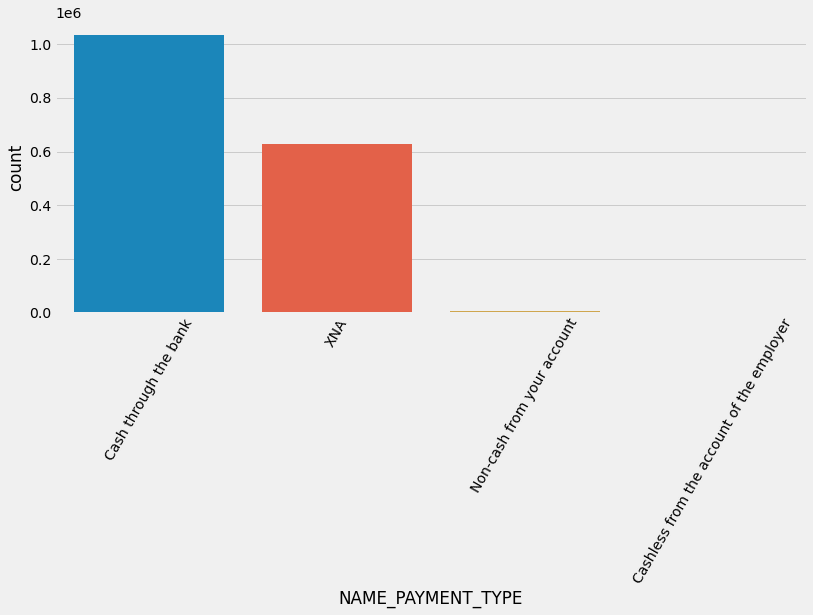

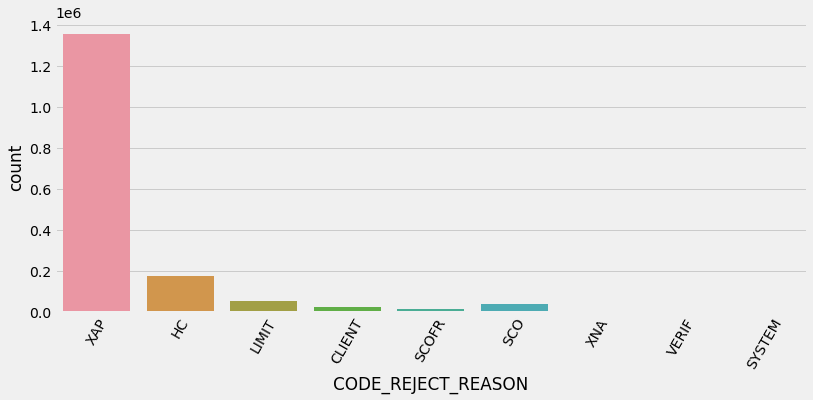

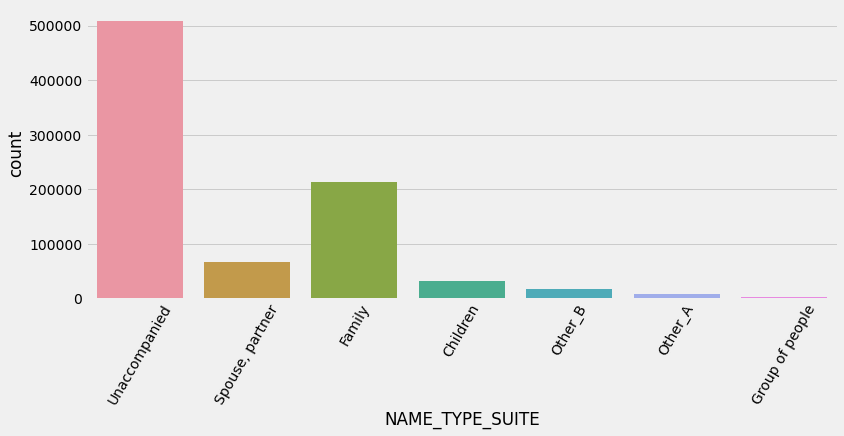

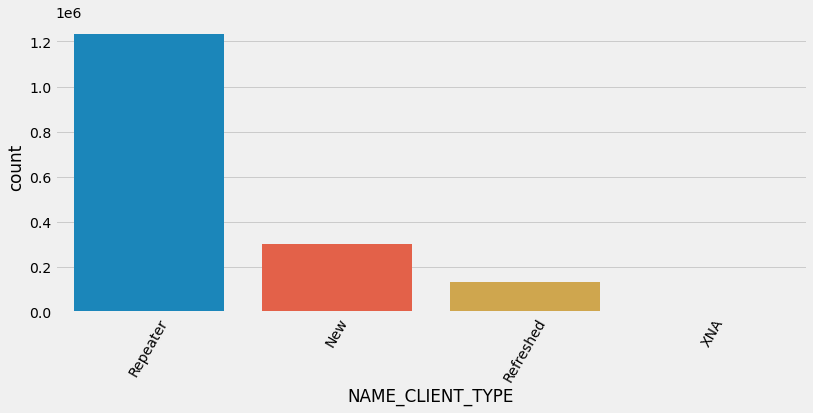

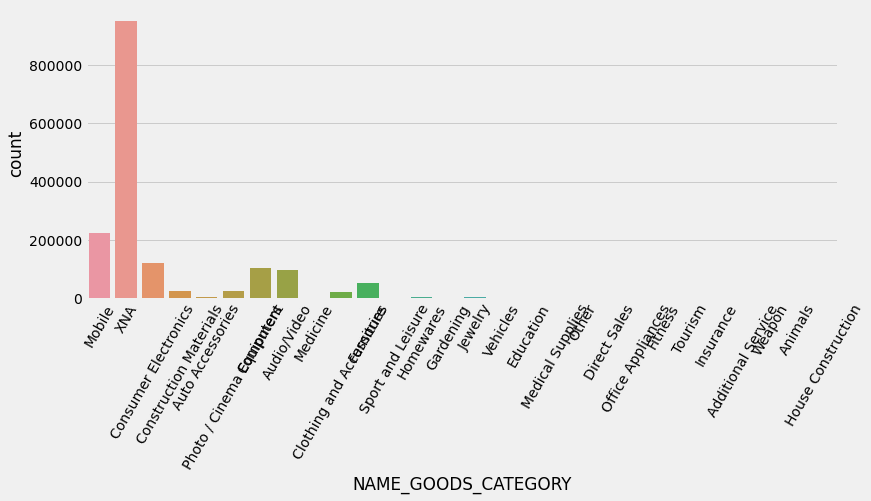

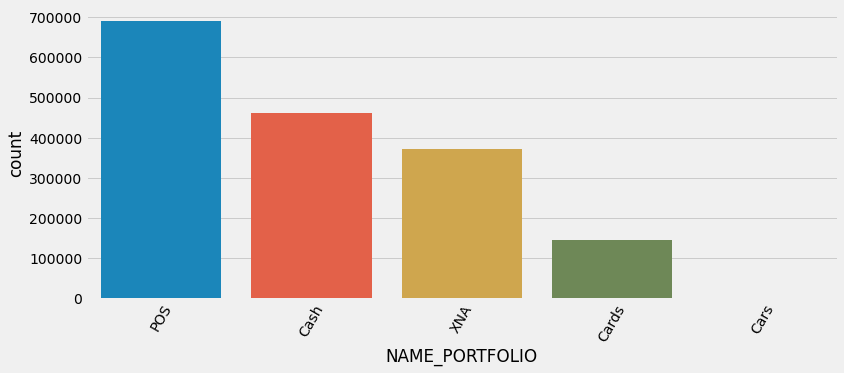

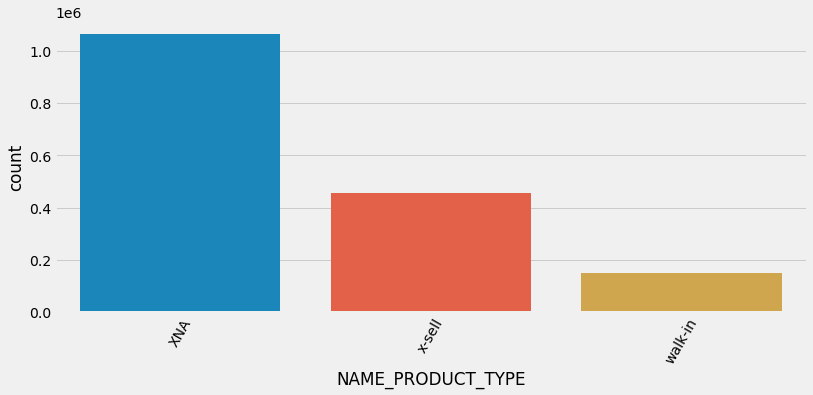

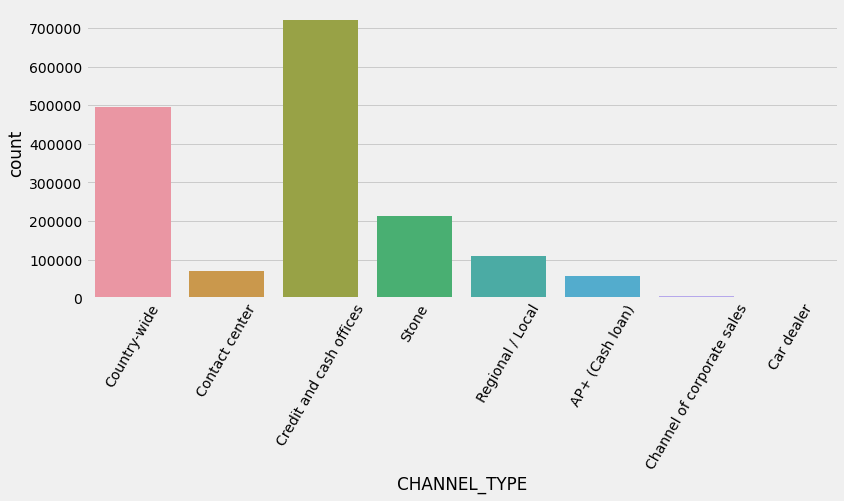

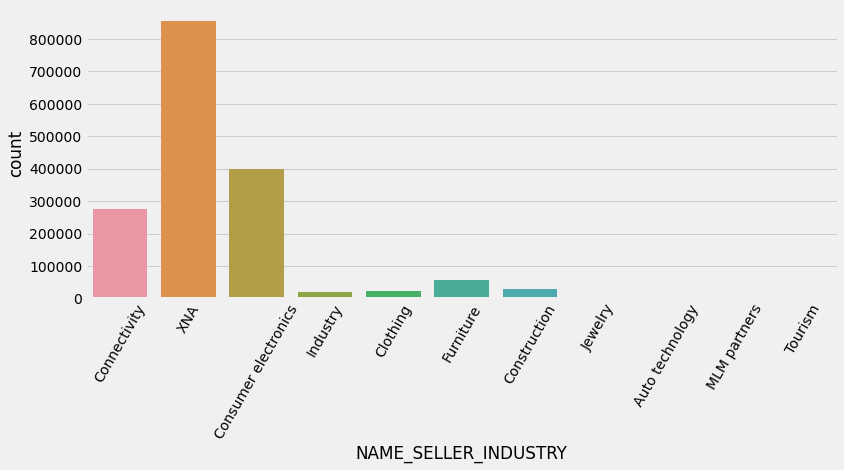

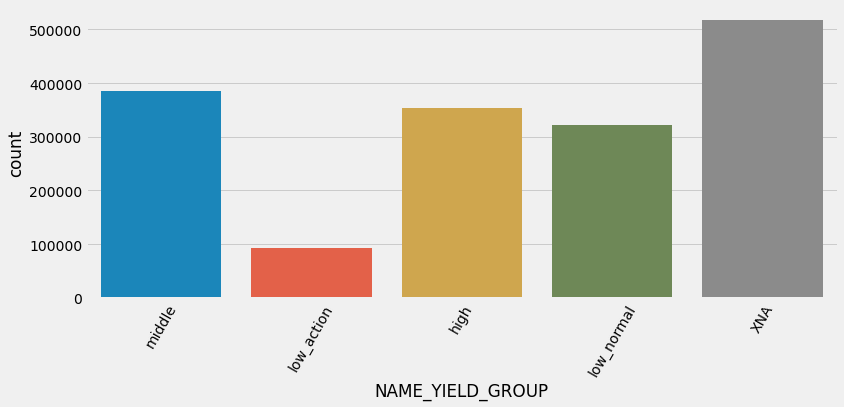

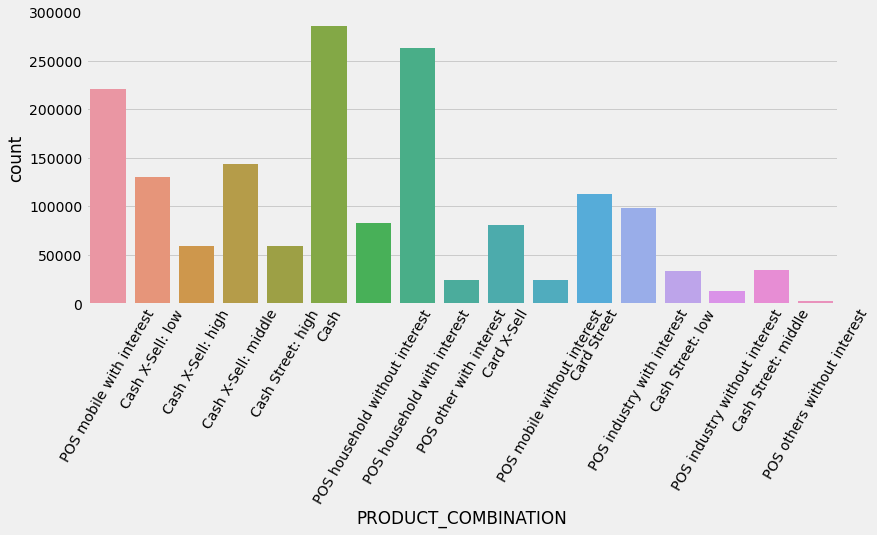

In [80]:
# Visualizing Categorical Data

graph_objects(prev_appli)

<Figure size 864x360 with 0 Axes>

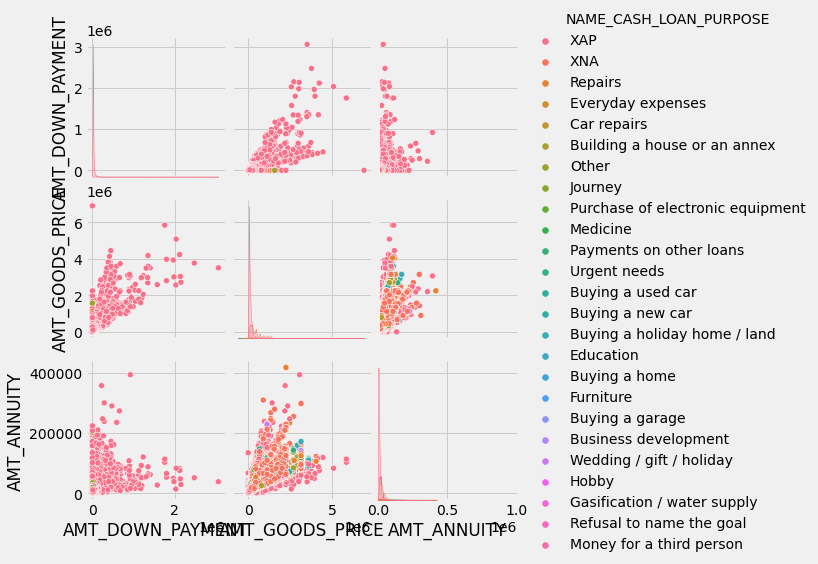

In [81]:
#Visualizing the relationships between AMT_DOWN_PAYMENT, AMT_GOODS_PRICE, AMT_ANNUITY Vs. NAME_CASH_LOAN_PURPOSE
plt.figure(figsize=(12,5))
ax = sns.pairplot(prev_appli, vars = ['AMT_DOWN_PAYMENT','AMT_GOODS_PRICE','AMT_ANNUITY'], hue='NAME_CASH_LOAN_PURPOSE');
plt.xlim((0,1000000))
plt.show()

AMT_ANNUITY and AMT_DOWN_PAYMENT are highly corrleated with a postive linear slope.  
AMT_ANNUITY and AMT_GOODS_PRICE are highly corrleated with a postive linear slope.  
AMT_GOODS_PRICE and AMT_DOWN_PAYMENT are highly corrleated with a postive linear slope.

<Figure size 864x360 with 0 Axes>

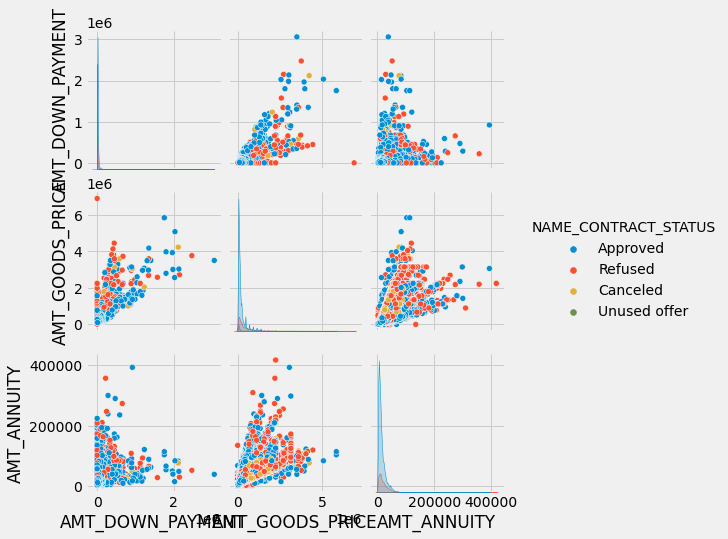

In [82]:
#Visualizing the relationships between AMT_DOWN_PAYMENT, AMT_GOODS_PRICE, AMT_ANNUITY Vs. NAME_CONTRACT_STATUS
plt.figure(figsize=(12,5))
ax = sns.pairplot(prev_appli, vars = ['AMT_DOWN_PAYMENT','AMT_GOODS_PRICE','AMT_ANNUITY'], hue='NAME_CONTRACT_STATUS');
plt.show()

AMT_ANNUITY and AMT_DOWN_PAYMENT are highly corrleated with a postive linear slope.  
AMT_ANNUITY and AMT_GOODS_PRICE are highly corrleated with a postive linear slope.  
AMT_GOODS_PRICE and AMT_DOWN_PAYMENT are highly corrleated with a postive linear slope.

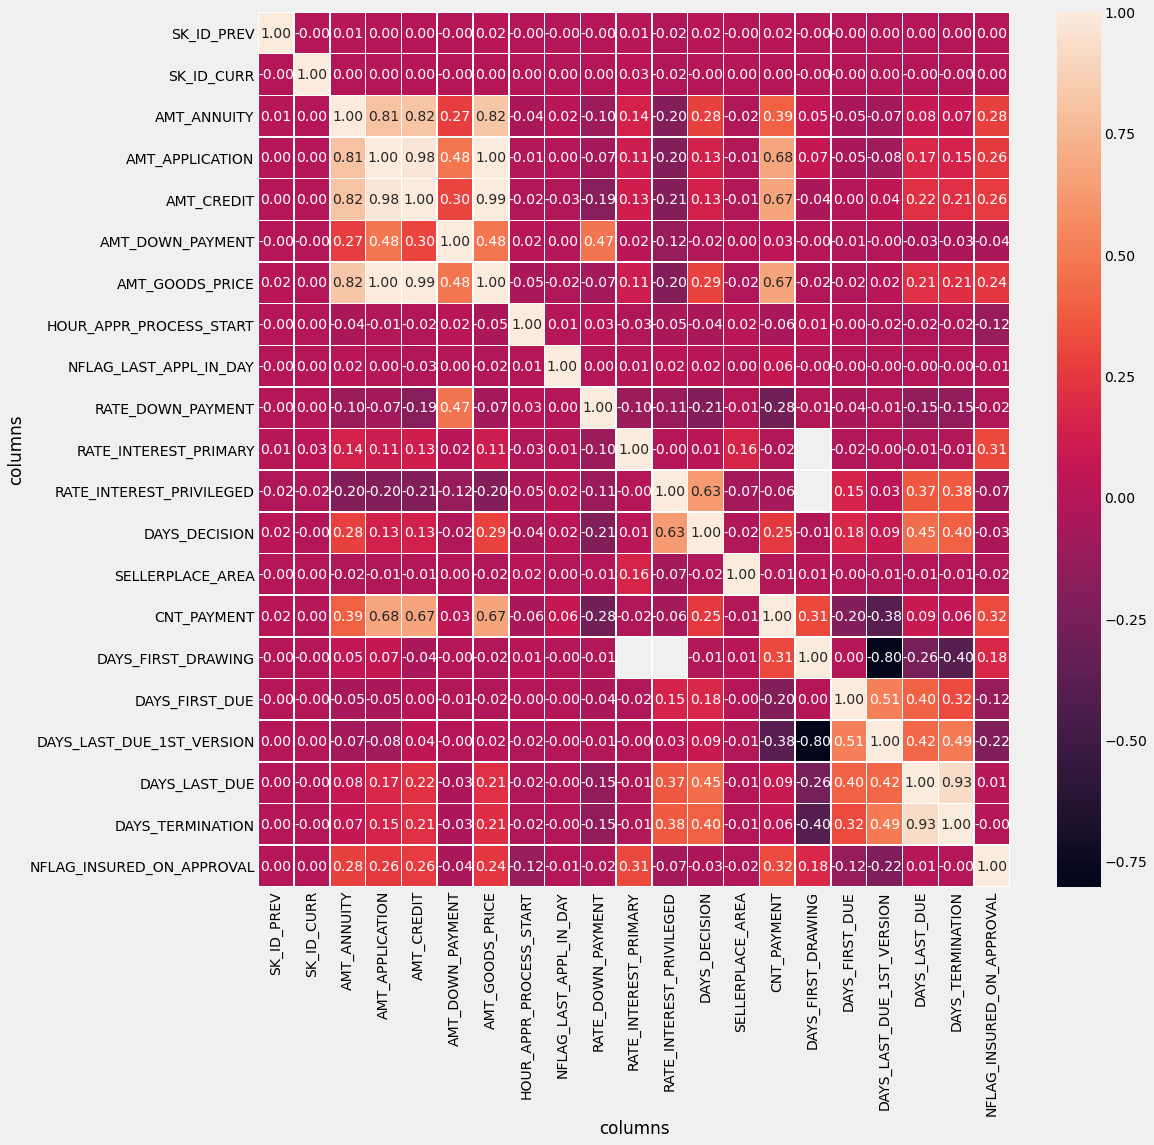

In [83]:
# Checking the Correlation 
fig, ax= plt.subplots(figsize = (15,15))
sns.heatmap(prev_appli.corr(), annot = True, fmt = ".2f", linewidths=.5, ax=ax)
plt.show()